# Practical Econometrics II: Exam (<b style="color:blue">R</b>)

# 2023-06-14

### <i> <b style="color:red">Stefan Ristikj</b> </i>


---
---

## Requirements

- All of the answers must be explained and justified by either tests, model output, or charts;
- If you are testing a hypothesis - write down the **null** and the **alternative** hypothesis; Also **clearly** state the results of the test.
- If you estimate a model, or carry out a test and make some conclusions based on it - indicate **the reason** that these conclusions are based on (e.g. $p$-value, $t$-statistic, residuals, plots, etc. some other test results, model functional form, coefficient interpretation, etc.);
- You should understand what your code does and how it works. You are also responsible that your code **is correctly working**.
- Plots, Charts, etc. should be readable, with clear explanations - either by including a legend or writing a couple of sentences explaining which colors correspond to which data/models/forecasts of interest. **Do not be afraid to comment the charts** - what do you see from the plots - is everything as you expect, do you identify any **potential** problems?
- **Important!** Do not forget to use `set.seed(STUDENT_CODE)` if you need to sample or simulate data, where `STUDENT_CODE` is **your** student code.

- Your solutions have to be coherent - i.e. if one task requires to select the best model, then the next task requires to write down the equation and the third one requires to carry out some model testing - clearly state what model you chose, **and why**, and use **only that model**, **unless the tasks specify otherwise**.

- <b style="color:red">If a task REQUIRES you to provide comments on the results - providing only code without explanation of the results does NOT count as a solution.</b>

----
----

## Some Recommended Libraries

You may need the following libraries:

In [1]:
rm(list = ls())
gc()

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,618426,33.1,1317620,70.4,1317620,70.4
Vcells,1109069,8.5,8388608,64.0,1632695,12.5


In [3]:
install.packages("imputeTS")

Installing package into 'C:/Users/risti/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



package 'imputeTS' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\risti\AppData\Local\Temp\RtmpAZjXGi\downloaded_packages


In [6]:
suppressPackageStartupMessages({
  suppressMessages({
    library(tidyverse)
    library(ggplot2)
    library(data.table)
    library(imputeTS)
    library(tempdisagg)
    library(plm)
  })
})

Warning message:
"package 'plm' was built under R version 4.2.3"


You can change the dimensions of plots by midifying the width and height in the code below:

In [30]:
options(repr.plot.width = 20)
options(repr.plot.height = 8)

You can also add in any other libraries that you will be using.

In [8]:
suppressPackageStartupMessages({
  suppressWarnings({
    # Add any additional libraries here
  })
})

NULL

## Function to get the data

Below is an `.R` code file, which will be used to generate the data, based on your student code:

In [10]:
source("http://web.vu.lt/mif/a.buteikis/wp-content/uploads/2023/06/EXAM2023.R")

## Specify your student code

**Replace** `YOUR_STUDENT_CODE` with your student code and run the following code to get your data sample:

In [9]:
STUDENT_CODE = 2309140

Your student code is a unique 7-digit code. The start of the student code depends on the year and study programme, with the last 4 digits being unique to each student. For example:

- `181xxxx` for VU Econometrics students, who enrolled in 2018;
- `191xxxx` for VU Econometrics students, who enrolled in 2019;
- etc.
- `210xxxx`, `220xxxx`, etc. for ERASMUS/international students;

# Get the dataset

Run the code below to get the equation for this exercise set:

In [11]:
dt_list <- get_data(STUDENT_CODE)
DT_ORIGINAL <- dt_list[[1]] %>% copy()
DT_FINAL    <- DT_ORIGINAL %>% copy()
Y8_annual   <- dt_list[[2]] %>% copy()
DT_proxy    <- dt_list[[3]] %>% copy()
rm(dt_list)

[1] "-------------------------------------------------------"
[1] "Frequency: monthly"
[1] "Y  = logarithm of motor gasoline consumption per car"
[1] "X1 = logarithm of real per-capita income"
[1] "X2 = logarithm of real motor gasoline price"
[1] "X3 = logarithm of the stock of cars per capita"
[1] "-------------------------------------------------------"
[1] "For TASK 1: 5th individual Y has missing data"
[1] "For TASK 2: 8th individual Y has NO data"


### `DT_ORIGINAL` is the initial **panel** dataset, which contains missing values for two countries out of 12:

In [12]:
glimpse(DT_ORIGINAL)

Rows: 228
Columns: 6
$ country <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,…
$ time    <dbl> 1960.083, 1960.167, 1960.250, 1960.333, 1960.417, 1960.500, 19…
$ Y       <dbl> 4.173244, 4.100989, 4.073177, 4.059509, 4.037689, 4.033983, 4.…
$ X1      <dbl> -6.474277, -6.426006, -6.407308, -6.370679, -6.322247, -6.2946…
$ X2      <dbl> -0.3345476, -0.3513276, -0.3795177, -0.4142514, -0.4453354, -0…
$ X3      <dbl> -9.766840, -9.608622, -9.457257, -9.343155, -9.237739, -9.1239…


### `DT_FINAL` is the dataset where you can override the missing values with the ones you create in the first two tasks. 

In [13]:
glimpse(DT_FINAL)

Rows: 228
Columns: 6
$ country <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,…
$ time    <dbl> 1960.083, 1960.167, 1960.250, 1960.333, 1960.417, 1960.500, 19…
$ Y       <dbl> 4.173244, 4.100989, 4.073177, 4.059509, 4.037689, 4.033983, 4.…
$ X1      <dbl> -6.474277, -6.426006, -6.407308, -6.370679, -6.322247, -6.2946…
$ X2      <dbl> -0.3345476, -0.3513276, -0.3795177, -0.4142514, -0.4453354, -0…
$ X3      <dbl> -9.766840, -9.608622, -9.457257, -9.343155, -9.237739, -9.1239…


Think of `DT_ORIGINAL` as a backup that you can always use to re-run the imputation code.

### For the disaggregation task - you have two additional data variables.

The **annual** values of `Y` for the `8th` individual:

In [14]:
glimpse(Y8_annual)

Rows: 2
Columns: 3
$ country <dbl> 8, 8
$ year    <dbl> 1960, 1961
$ Y       <dbl> 45.94259, 32.14311


And a couple of proxy variables to disaggregate the annual data: 

In [15]:
glimpse(DT_proxy)

Rows: 19
Columns: 5
$ country <dbl> 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8
$ time    <dbl> 1960.083, 1960.167, 1960.250, 1960.333, 1960.417, 1960.500, 19…
$ Z1      <dbl> 0.4881141, 0.5096777, 0.5446682, 0.5422281, 0.5706644, 0.61037…
$ Z2      <dbl> 4.817026, 4.722450, 4.565114, 4.675242, 4.561630, 4.518009, 4.…
$ Z3      <dbl> 3.0101021, 5.1147479, 4.8037383, 4.5540060, 2.2458137, 0.21980…


# **Task Set 1: Time series imputation**

You will firstly have to impute the missing values of the dependent variable of one country.

Carry out the tasks below:

- **(A)** The dependent variable `Y` of the `5th` country in the `DT_ORIGINAL` dataset contains missing data - `filter` the data for this individual, `select` the dependent variable and plot the data to make sure that there are indeed mising values. Do you notice any trend or seasonal patterns?
- **(B)** Select $3$ most appropriate methods from the `imputeTS` library to impute the missing values and visually compare the results. Then select the best method and overwrite the `Y` values of the `5th` country in the `DT_FINAL` dataset with the imputed values.

**Note**: 
- you might need to use `ts()` to transform the variables into time series objects. Furthermore, **do not modify** `DT_ORIGINAL` just in case you'll want to re-do the calculations!

**Hint**: assuming that `DT_FINAL` is ordered by time, you can override the values for the `5th` country using `data.table` syntax like `DT_FINAL[country == 5, Y := imputed_values]`, where `imputed_values` is a vector of imputed and original values.

*Solutions*:

**(A) The dependent variable Y of the 5th country in the DT_ORIGINAL dataset contains missing data - filter the data for this individual, select the dependent variable and plot the data to make sure that there are indeed mising values. Do you notice any trend or seasonal patterns?**

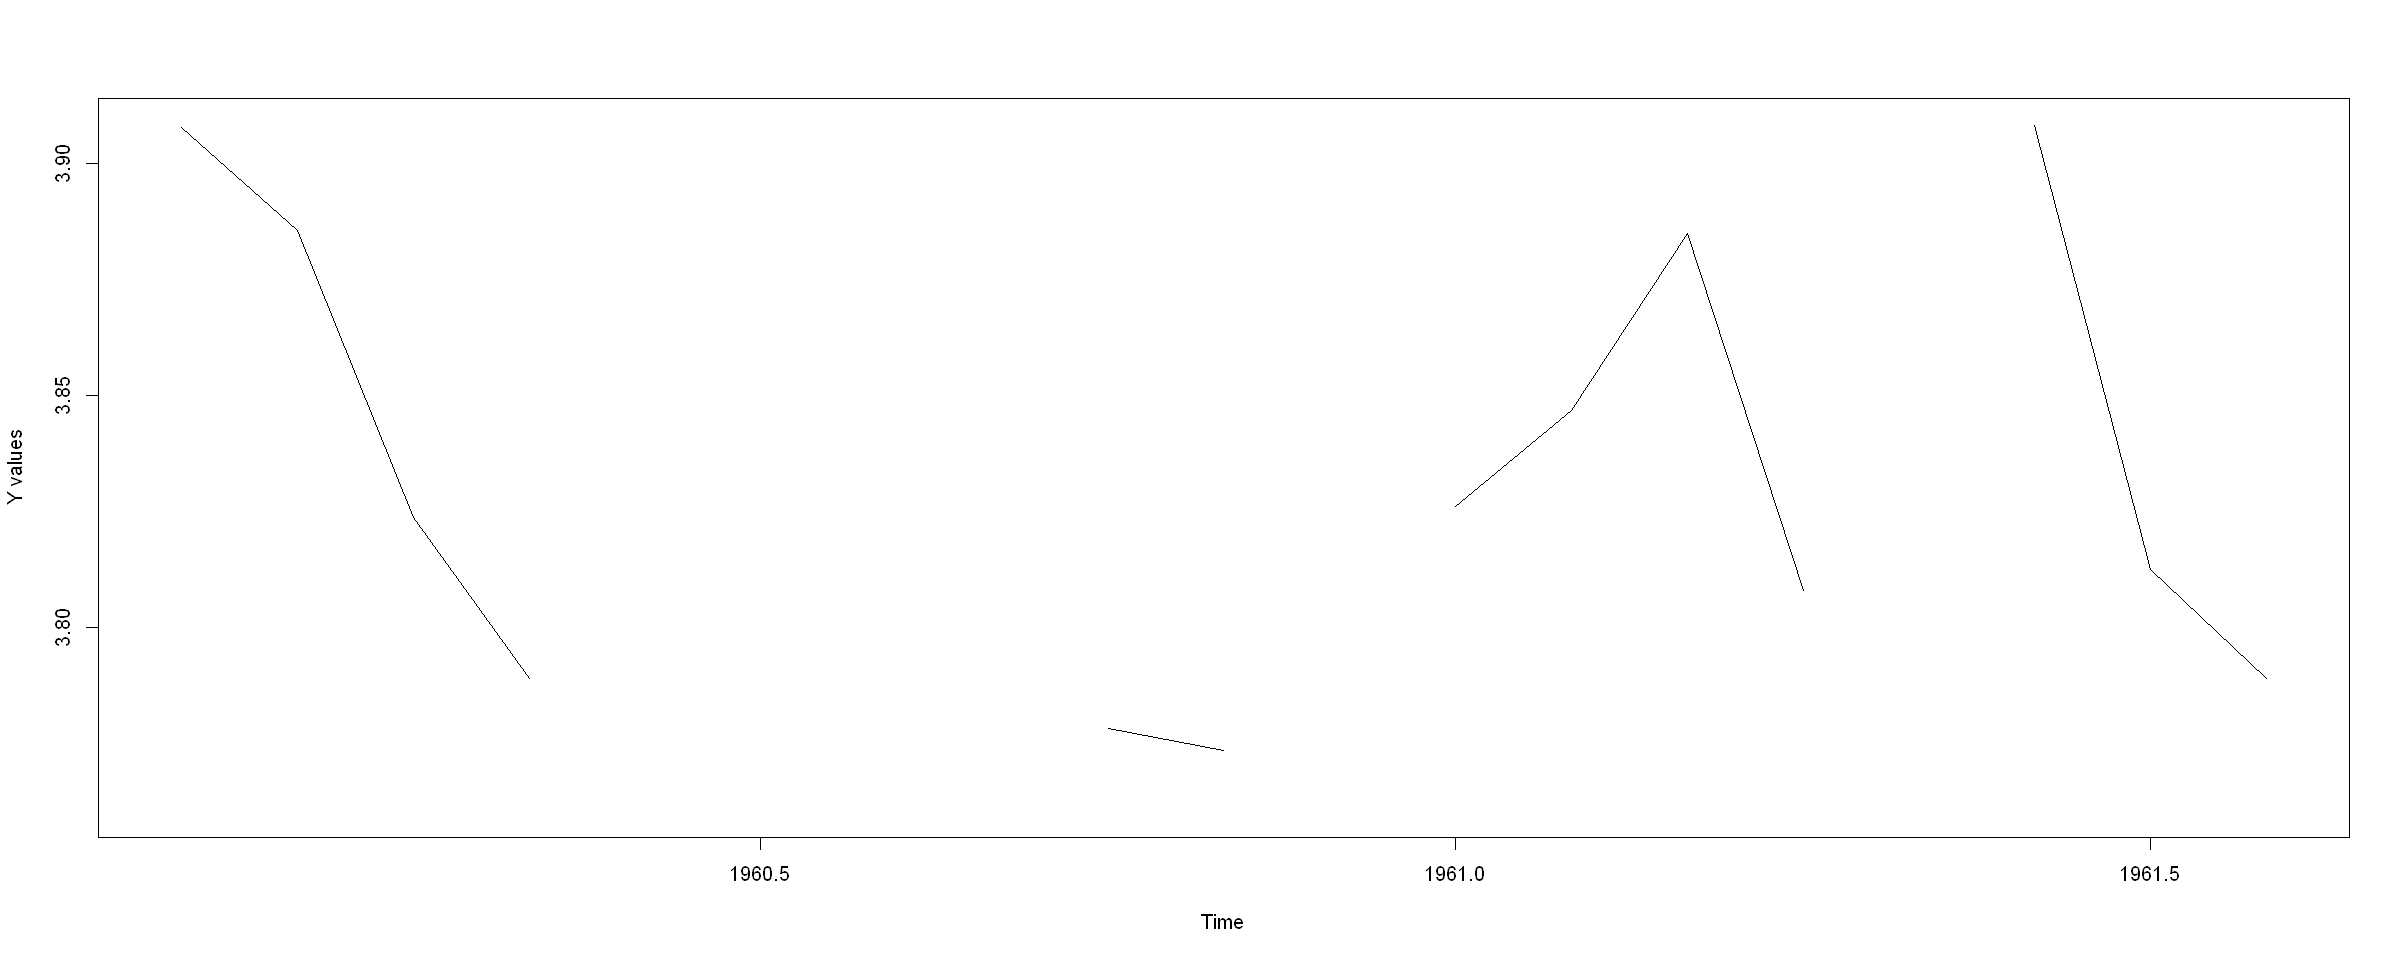

In [32]:
dt_visual <- DT_ORIGINAL[DT_ORIGINAL$country==5]
plot(dt_visual$time, dt_visual$Y, type="l", xlab="Time", ylab="Y values")

In [33]:
dt_visual

country,time,Y,X1,X2,X3
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5,1960.083,3.907704,-6.264363,-0.01959833,-9.145706
5,1960.167,3.885623,-6.220883,-0.02386000,-9.044253
5,1960.250,3.823666,-6.173592,-0.06892022,-8.930133
5,1960.333,3.788997,-6.137060,-0.13792900,-8.818632
5,1960.417,NA,-6.087237,-0.19784646,-8.710965
5,1960.500,3.760584,-6.048528,-0.23365325,-8.629390
5,1960.583,NA,-6.000836,-0.26427164,-8.545771
5,1960.667,NA,-5.955660,-0.29405795,-8.487370
5,1960.750,3.778230,-5.901380,-0.32316179,-8.425551


By succesfully plotting the dependent variable Y from the 5th country in the original dataset, we can clearly see that there are missing values. A lot of them actually, which in my opinion makes it very hard, if not impossible to determine whether there is a trend or seasonality in the data. From what I can see, there is no clear trend since the minimum and maximum values do not really change over time, but maybe there is some seasonality given the similar peaks and dropoffs at various points in time.

**(B) Select 3 most appropriate methods from the imputeTS library to impute the missing values and visually compare the results. Then select the best method and overwrite the Y values of the 5th country in the DT_FINAL dataset with the imputed values.**

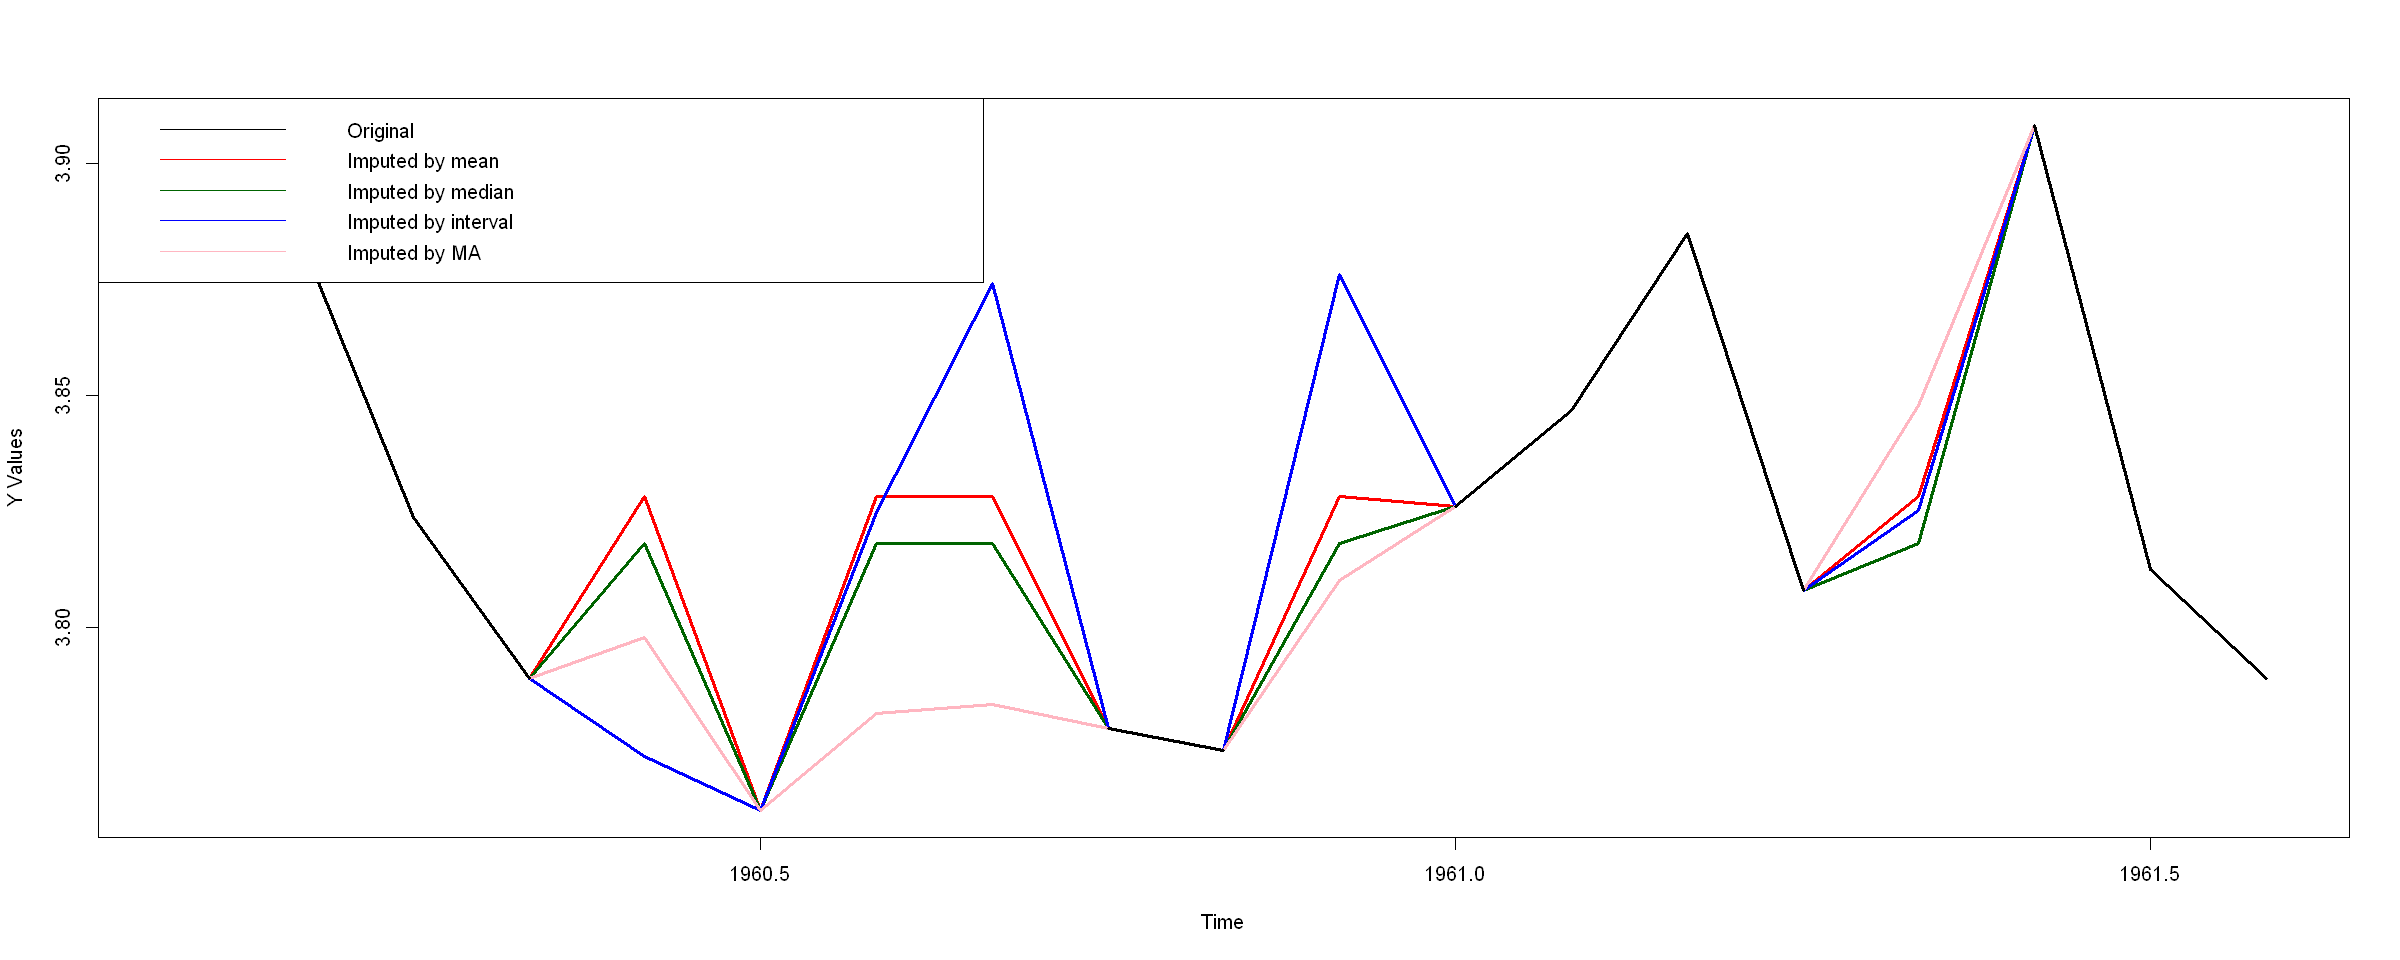

In [85]:
set.seed(STUDENT_CODE)
dt_ts <- dt_visual %>%
    mutate(time_series <- ts(dt_visual$Y, start=dt_visual$time[1], frequency=12))
dt_ts <- dt_ts %>% 
  mutate(`Imputed by mean` = imputeTS::na_mean(time_series, option = "mean"),
         `Imputed by median` = imputeTS::na_mean(time_series, option = "median"),
         `Imputed by random from interval` = imputeTS::na_random(time_series, 
                             lower_bound = min(time_series, na.rm = TRUE), 
                             upper_bound = max(time_series, na.rm = TRUE)),
         `Imputed by moving-average` = imputeTS::na_ma(time_series, k = frequency(time_series)),
         `Imputed by ARIMA` = imputeTS::na_kalman(time_series, model = "auto.arima"),
         #`Imputed by seasonal decomposition + ARIMA` = imputeTS::na_seadec(time_series, algorithm = "kalman", model = "auto.arima"),
         #`Imputed by seasonal split + ARIMA` = imputeTS::na_seasplit(time_series, algorithm = "kalman", model = "auto.arima"),
         `Linear interpolation` = imputeTS::na_interpolation(time_series, option = "linear"),
         `Spline interpolation` = imputeTS::na_interpolation(time_series, option = "spline"),
         `Last Observation Carried Forward` = imputeTS::na_locf(time_series, option = "locf"),
         `Next Observation Carried Backward` = imputeTS::na_locf(time_series, option = "nocb")
         )

plot(dt_ts$`Imputed by mean`, type = "l", xlab = "Time", ylab = "Y Values", col = "red", lwd = 2.5)
lines(dt_ts$`Imputed by median`, col = "darkgreen", lwd = 2.5)
lines(dt_ts$`Imputed by random from interval`, col = "blue", lwd = 2.5)
lines(dt_ts$`Imputed by moving-average`, col = "lightpink", lwd = 2.5)
lines(dt_ts$time_series, col = "black", lwd = 2.5)
legend("topleft",
       legend = c("Original", "Imputed by mean", "Imputed by median", "Imputed by interval", "Imputed by MA"), 
       col = c("black", "red", "darkgreen", "blue", "lightpink"), lty = 1)

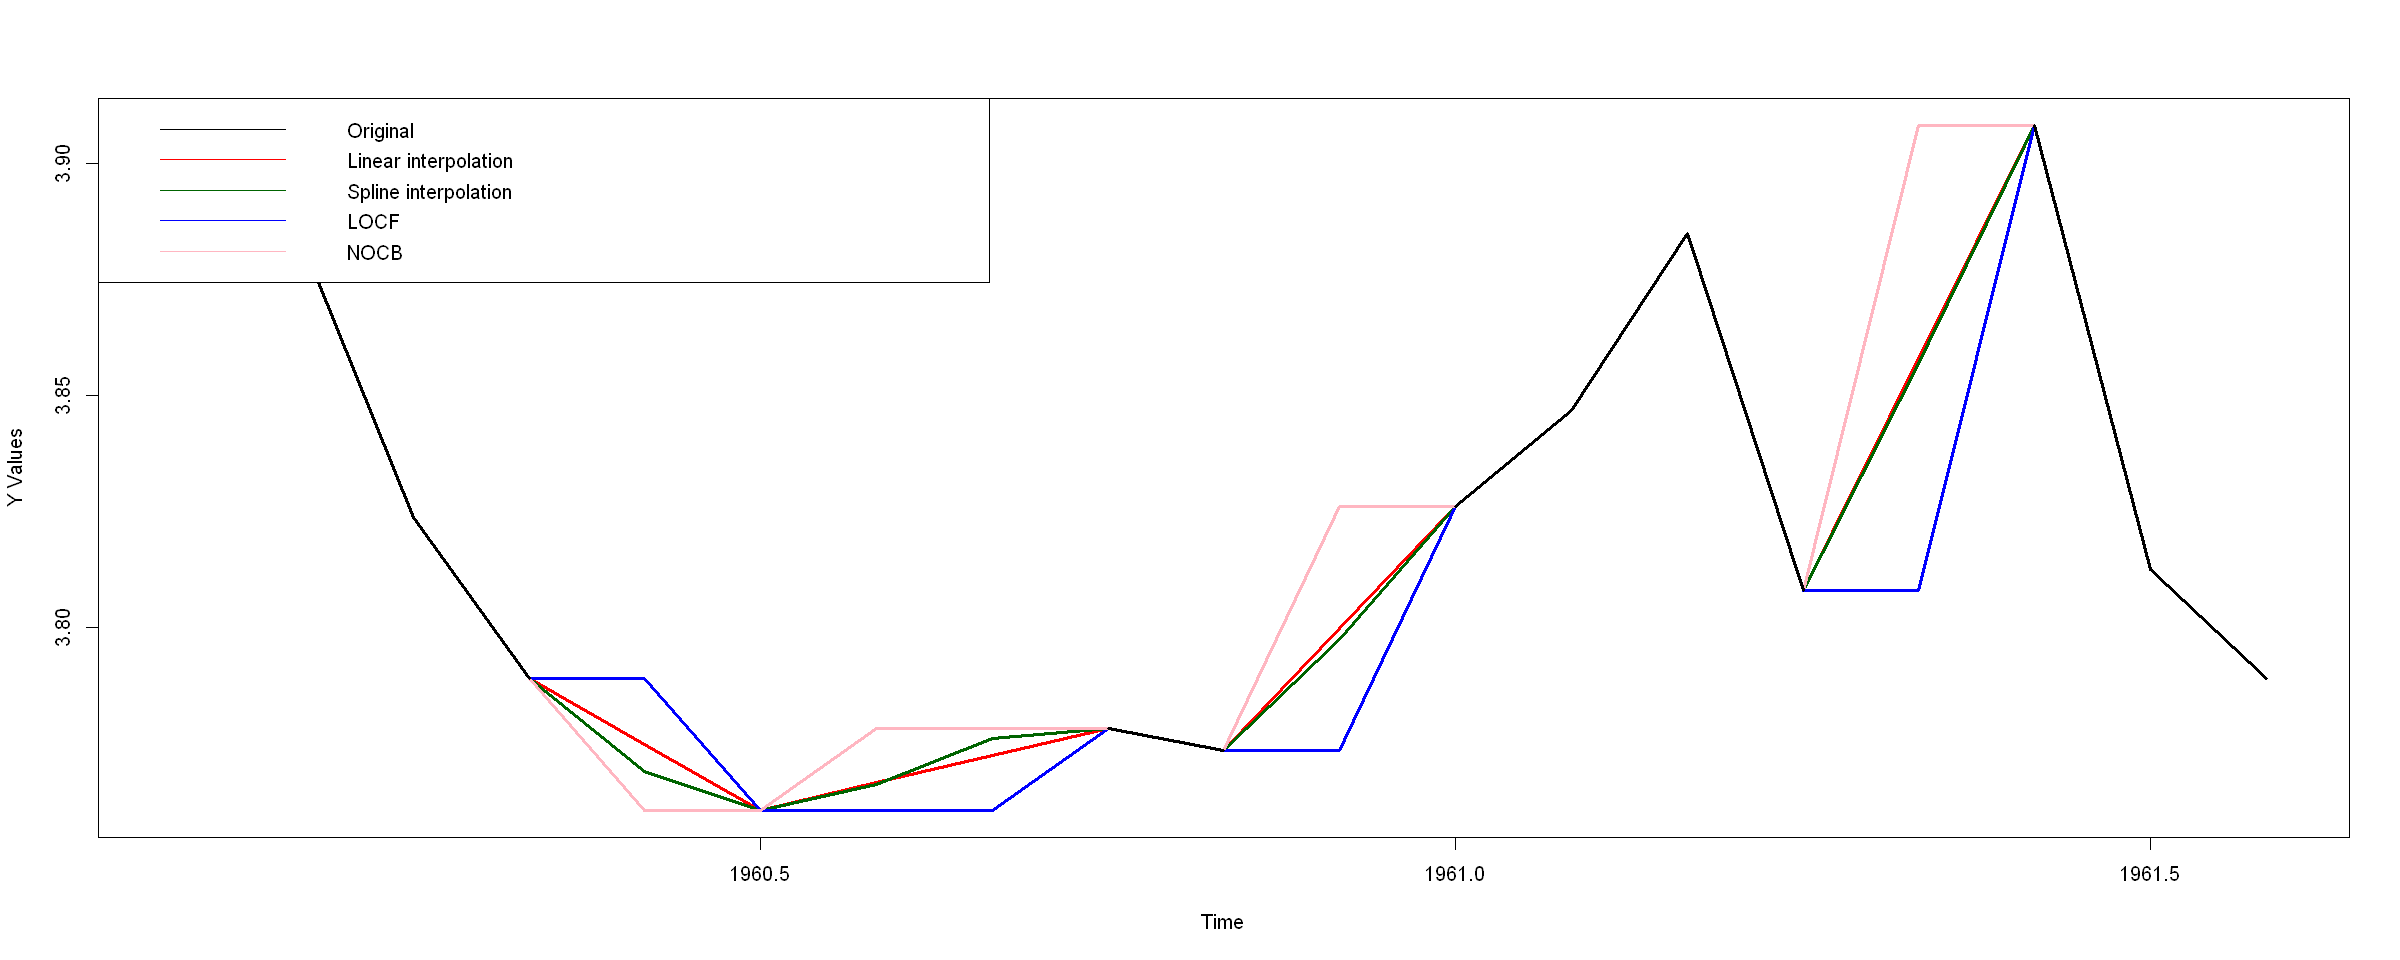

In [86]:
plot(dt_ts$`Linear interpolation`, type = "l", xlab = "Time", ylab = "Y Values", col = "red", lwd = 2.5)
lines(dt_ts$`Spline interpolation`, col = "darkgreen", lwd = 2.5)
lines(dt_ts$`Last Observation Carried Forward`, col = "blue", lwd = 2.5)
lines(dt_ts$`Next Observation Carried Backward`, col = "lightpink", lwd = 2.5)
lines(dt_ts$time_series, col = "black", lwd = 2.5)
legend("topleft",
       legend = c("Original", "Linear interpolation", "Spline interpolation", "LOCF", "NOCB"), 
       col = c("black", "red", "darkgreen", "blue", "lightpink"), lty = 1)

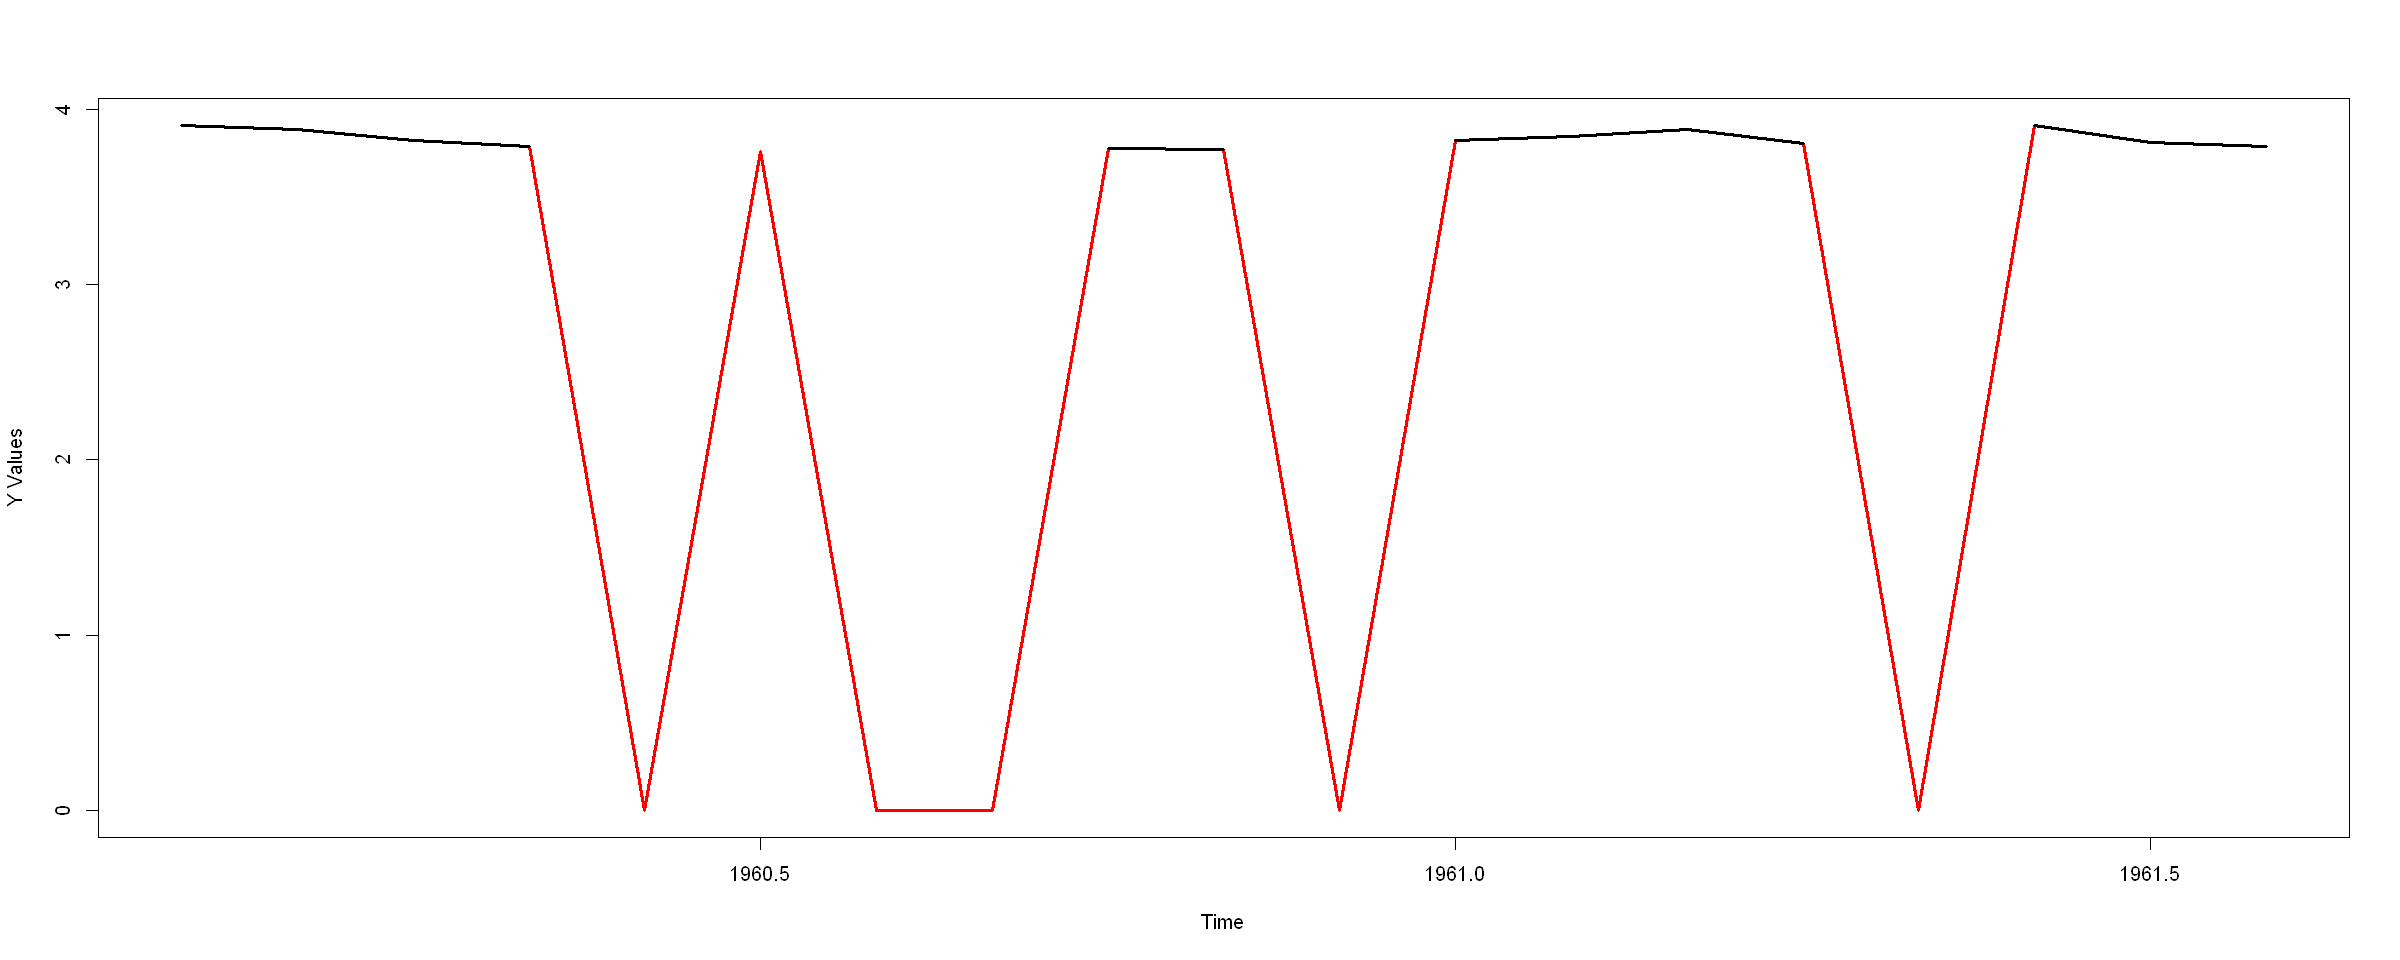

In [87]:
plot(dt_ts$`Imputed by ARIMA`, type = "l", xlab = "Time", ylab = "Y Values", col = "red", lwd = 2.5)
lines(dt_ts$time_series, col = "black", lwd = 2.5)

As we can see, due to the large part of the data being NA, ARIMA does not do a good imputation.

seadec() and seasplit(), from the ones that we have gone over in lectures, cannot be done since there is too little data for the functions to perform a seasonal decomposition or seasonal split. From the others, we know that mean, median and random from interval would never work in real life, and LOCF/NOCB don't really make sense so we will take moving-average and both interpolations for further analysis.

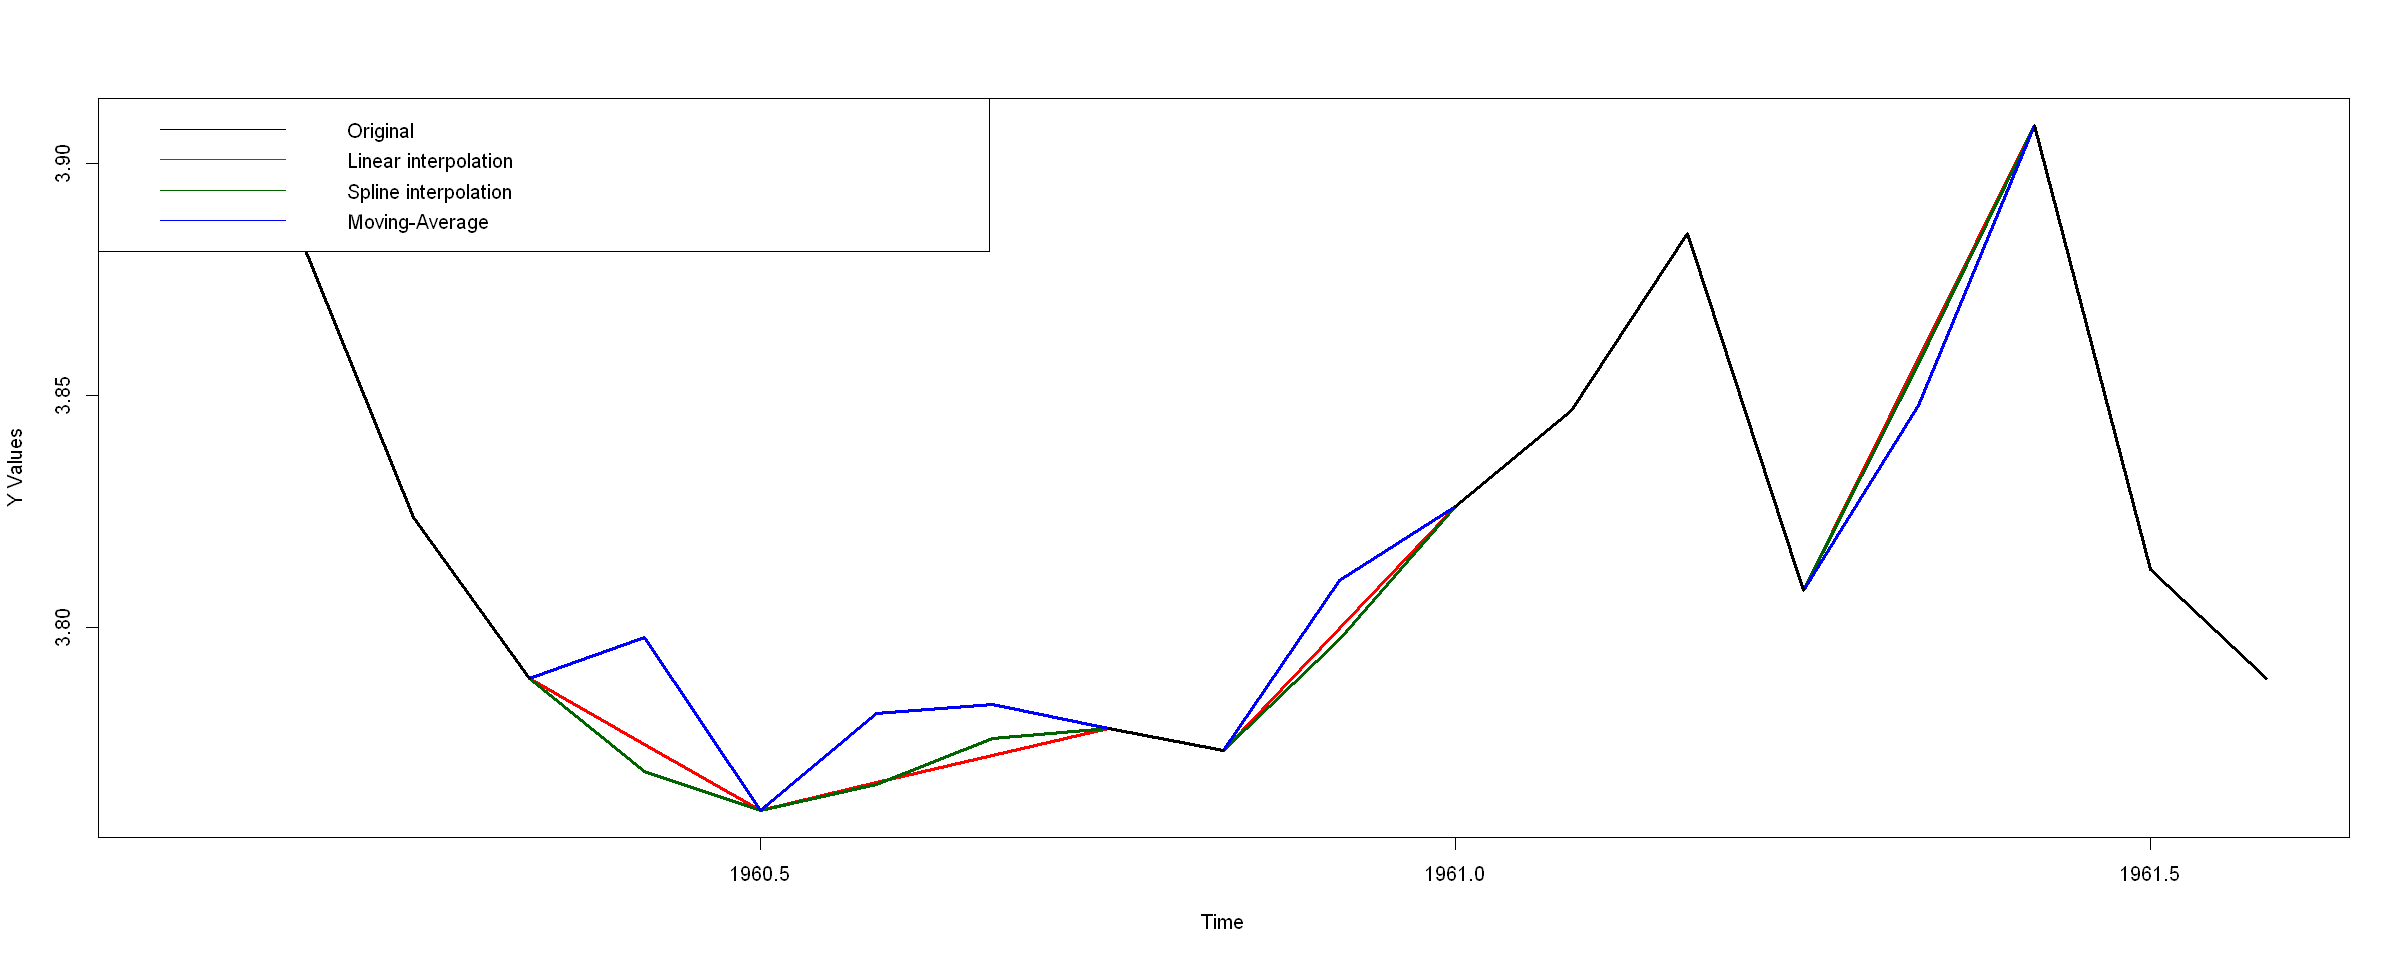

In [88]:
plot(dt_ts$`Linear interpolation`, type = "l", xlab = "Time", ylab = "Y Values", col = "red", lwd = 2.5)
lines(dt_ts$`Spline interpolation`, col = "darkgreen", lwd = 2.5)
lines(dt_ts$`Imputed by moving-average`, col = "blue", lwd = 2.5)
lines(dt_ts$time_series, col = "black", lwd = 2.5)
legend("topleft",
       legend = c("Original", "Linear interpolation", "Spline interpolation", "Moving-Average"), 
       col = c("black", "red", "darkgreen", "blue"), lty = 1)

Realistically speaking, moving-average tries to replicate some seasonality but it may be completely wrong, so to go on the safe side and minimize the errors regardless of the actual values, I would take Spline Interpolation, which has some variation in order to maybe capture some potential seasonality, but is less prone to very high errors in case the values are as expected.

In [95]:
imputed_values <- ifelse(is.na(dt_ts$Y), dt_ts$`Spline interpolation`, dt_ts$Y)
DT_FINAL[country == 5, Y := imputed_values]

In [97]:
DT_FINAL[country == 5]

country,time,Y,X1,X2,X3
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5,1960.083,3.907704,-6.264363,-0.01959833,-9.145706
5,1960.167,3.885623,-6.220883,-0.02386000,-9.044253
5,1960.250,3.823666,-6.173592,-0.06892022,-8.930133
5,1960.333,3.788997,-6.137060,-0.13792900,-8.818632
5,1960.417,3.768973,-6.087237,-0.19784646,-8.710965
5,1960.500,3.760584,-6.048528,-0.23365325,-8.629390
5,1960.583,3.766093,-6.000836,-0.26427164,-8.545771
5,1960.667,3.776086,-5.955660,-0.29405795,-8.487370
5,1960.750,3.778230,-5.901380,-0.32316179,-8.425551


As necessary, the imputed values are in the DT_FINAL dataset, only when there is a missing value for Y.

# **Task Set 2: Time series disaggregation**

The dependent variable `Y` of the `8th` country in the `DT_ORIGINAL` variable is not available - all of its values are `NA`. Fortunately, you have received **annual** `Y` data (each year is a **sum** of individual months/quarters) for this individual, as well as a couple of *proxy* variables, which are in a higher frequency. 

The variables are available in `Y8_annual` (the annual data of the `8th` country) and `DT_proxy` (the higher frequency variables of the `8th` country).

Carry out the tasks below:

- **(A)** You suspect that not all of the variables in `DT_proxy` are appropriate for disaggregating $Y_{8,t}^{(annual)}$:
    - plot the `Y` values of the **other** individuals from `DT_FINAL` and take note of any trend and/or seasonal patterns. 
    - plot the annual `Y` data in `Y8_annual` and the proxy variables from `DT_proxy` (separate plots).
    - Based on the above plots, which variables from `DT_proxy` should **not** be used when disaggregating `Y8_annual`?
- **(B)** Use the the `tempdisagg` library along with the **appropriate** `DT_proxy` variables to disaggregate `Y8_annual` into the same frequency as the data in `DT_FINAL` and plot the disaggregated series. Finally, overwrite the `Y` values of the `8th` country in the `DT_FINAL` variable with the disaggregated values. 

**Note**: 

- you might need to use `ts()` to transform the variables into time series objects. Furthermore, **do not modify** `DT_ORIGINAL` just in case you'll want to re-do the calculations!
- if you only have 2 annual data points - you won't be able to include all proxy variables. In this case, using `method = "denton-cholette"` with a single variable will disaggregate the series, while `method = "chow-lin-maxlog"` might return the following error <code style="color:red">not enough degrees of freedom</code> due to a lack of observations.

**Hint**: assuming that `DT_FINAL` is ordered by time, you override the values for the `8th` country using `data.table` syntax like `DT_FINAL[country == 8, Y := disaggregated_values]`, where `disaggregated_values` is a vector of disaggregated values.

*Solutions*:

**(A) You suspect that not all of the variables in DT_proxy are appropriate for disaggregating  𝑌(𝑎𝑛𝑛𝑢𝑎𝑙)8,𝑡:
plot the Y values of the other individuals from DT_FINAL and take note of any trend and/or seasonal patterns.
plot the annual Y data in Y8_annual and the proxy variables from DT_proxy (separate plots).
Based on the above plots, which variables from DT_proxy should not be used when disaggregating Y8_annual?**

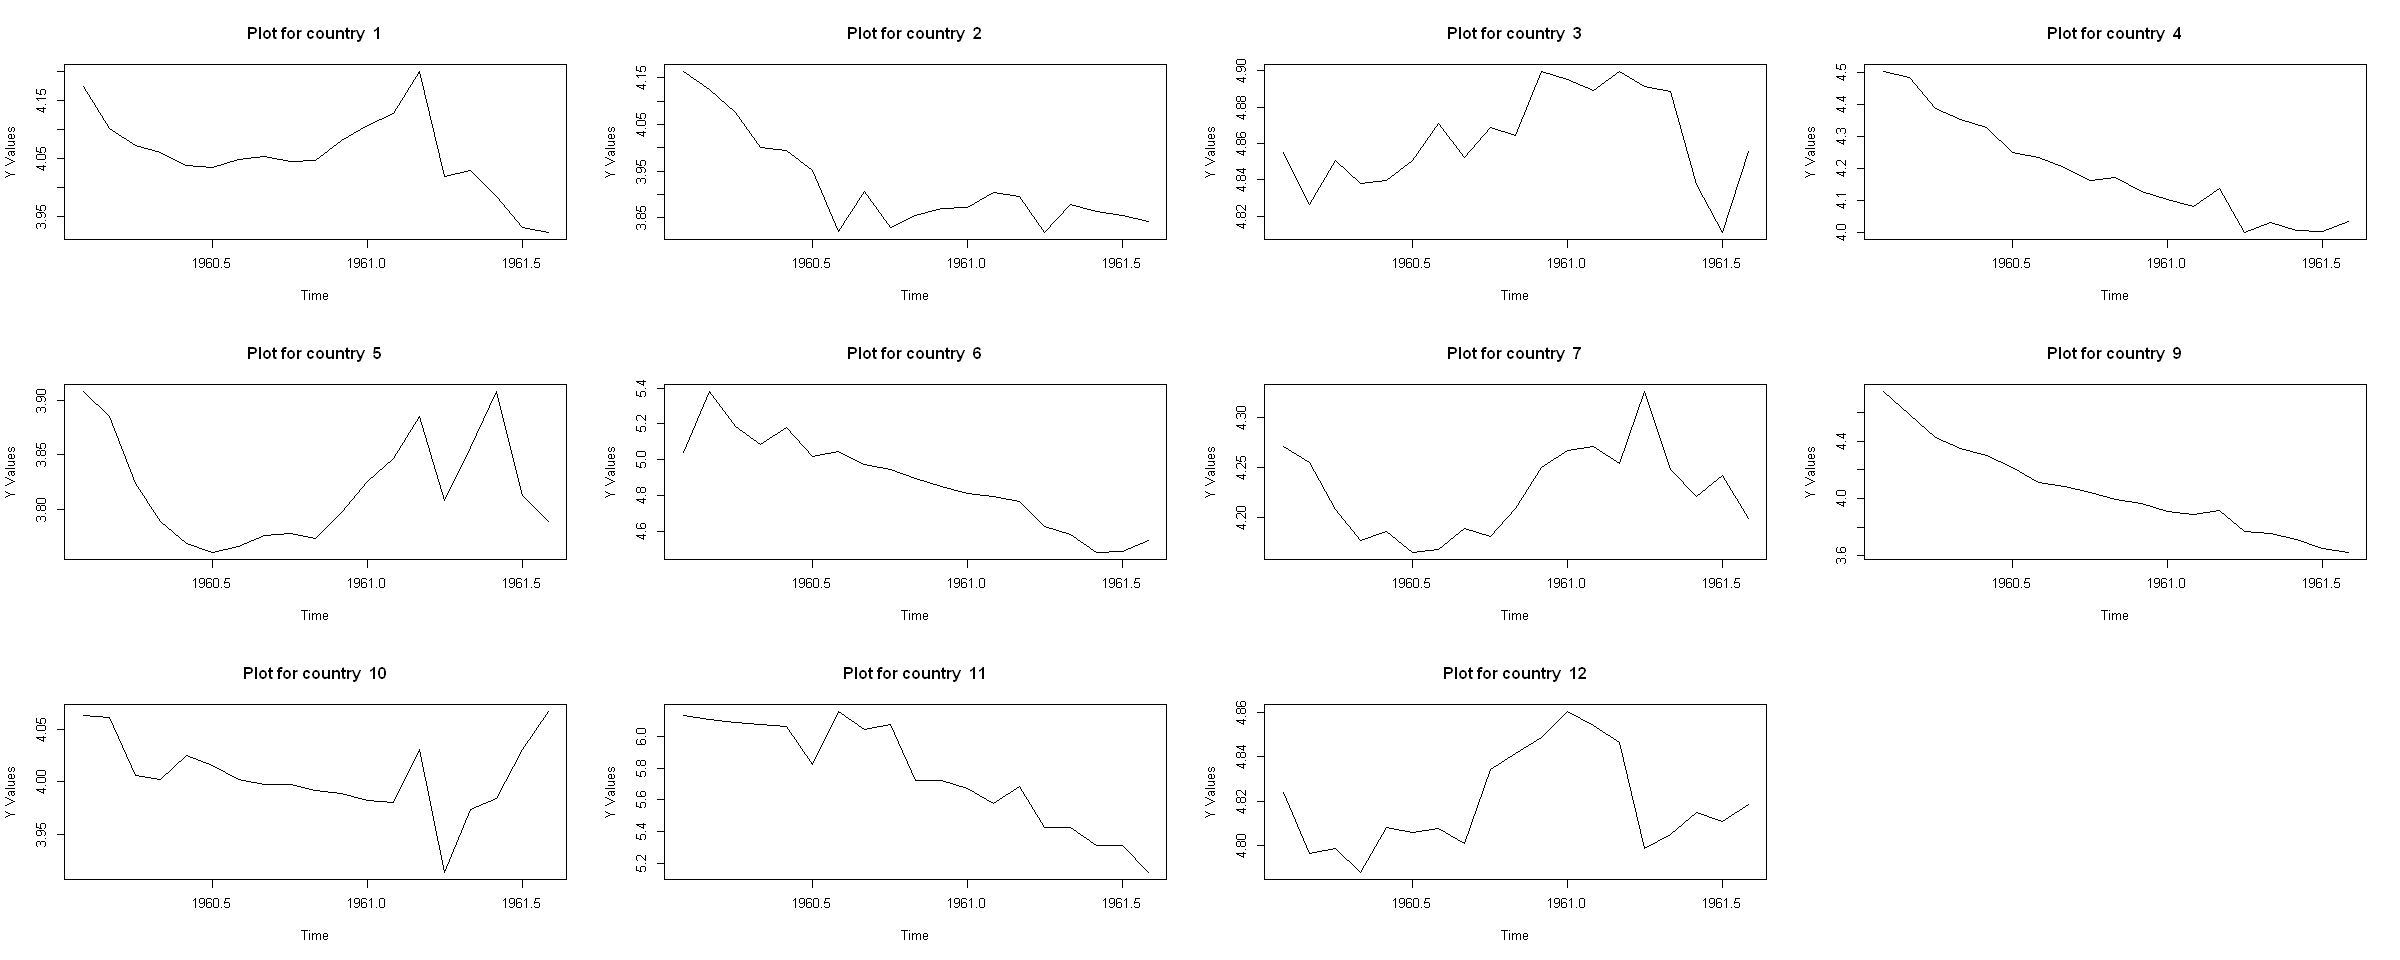

In [116]:
par(mfrow = c(3, 4))
for(i in unique(DT_FINAL$country)) {
    if(i==8) {
        next
    }
    dt_temp <- DT_FINAL[country==i]
    plot(dt_temp$time, dt_temp$Y, type = "l", xlab = "Time", ylab = "Y Values", main = paste("Plot for country ", i))
}

From the plots of all the countries except 8, I can see a trend pattern in 4, 6, 9 and maybe 2 and 11, and a separate trend in 1, 5 and 7. Seasonality patterns are much harder to notice here, but maybe 5 and 7, 1 with 10 and probably 4 with 9.

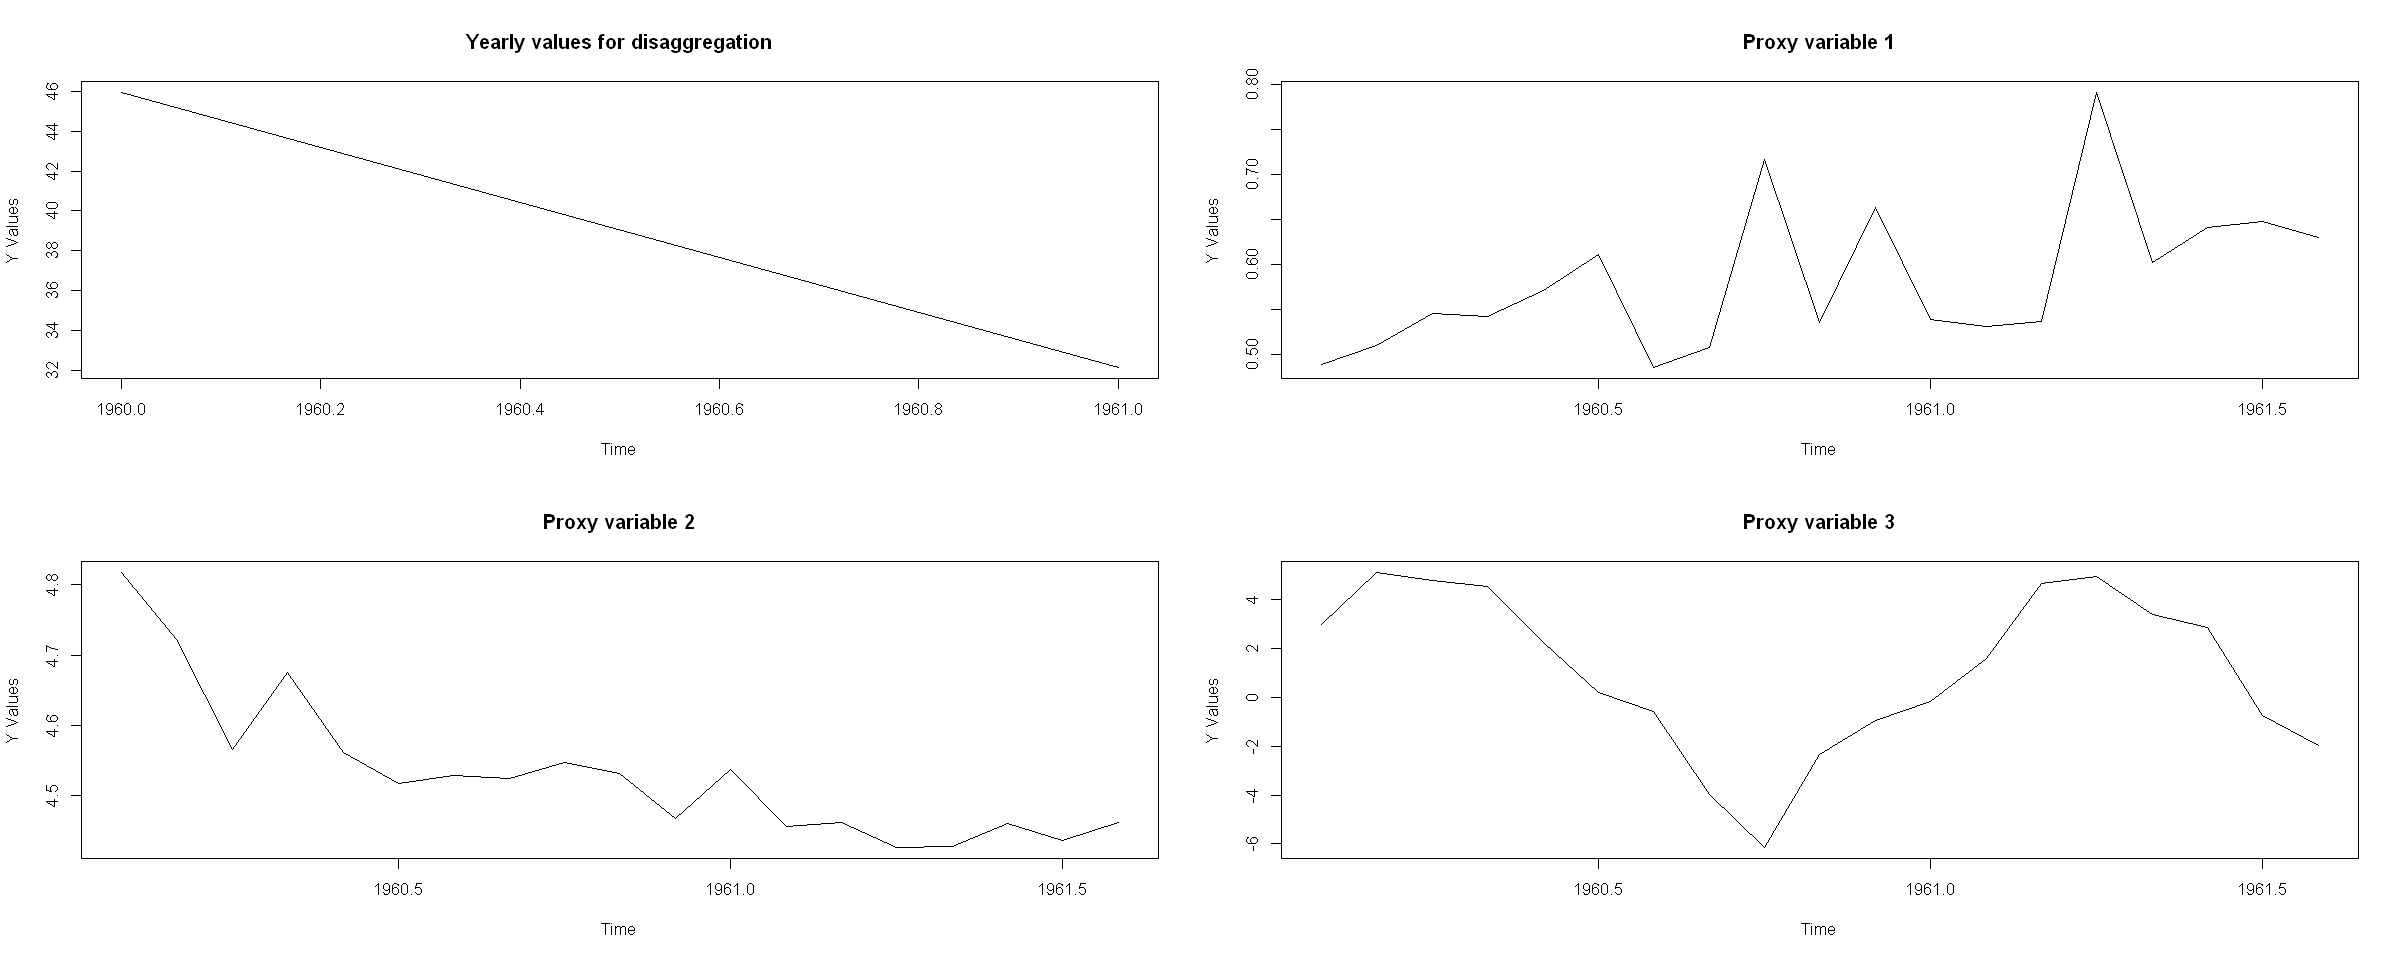

In [114]:
par(mfrow = c(2, 2))
plot(Y8_annual$year, Y8_annual$Y, type = "l", xlab = "Time", ylab = "Y Values", main = "Yearly values for disaggregation")
plot(DT_proxy$time, DT_proxy$Z1, type = "l", xlab = "Time", ylab = "Y Values", main = "Proxy variable 1")
plot(DT_proxy$time, DT_proxy$Z2, type = "l", xlab = "Time", ylab = "Y Values", main = "Proxy variable 2")
plot(DT_proxy$time, DT_proxy$Z3, type = "l", xlab = "Time", ylab = "Y Values", main = "Proxy variable 3")

Given all the plots above, I think that proxy variable 1 is not suitable for disaggregation of the time series. Variable 2 has very similar trend as almost half of the plots (2, 4, 6, 9, 11) with similar seasonality like country 2, proxy variable 3 has a similar trend to countries 1, 5 and 7 whereas proxy variable 1 has much more seasonality than any country, and the trend does not really match any plot.

**(B) Use the the tempdisagg library along with the appropriate DT_proxy variables to disaggregate Y8_annual into the same frequency as the data in DT_FINAL and plot the disaggregated series. Finally, overwrite the Y values of the 8th country in the DT_FINAL variable with the disaggregated values.**

In [146]:
Y8_annual

country,year,Y
<dbl>,<dbl>,<dbl>
8,1960,45.94259
8,1961,32.14311


In [147]:
valid_proxy

country,time,Z2,Z3
<dbl>,<dbl>,<dbl>,<dbl>
8,1960.083,4.817026,3.0101021
8,1960.167,4.722450,5.1147479
8,1960.250,4.565114,4.8037383
8,1960.333,4.675242,4.5540060
8,1960.417,4.561630,2.2458137
8,1960.500,4.518009,0.2198072
8,1960.583,4.528442,-0.5842566
8,1960.667,4.523998,-3.9578202
8,1960.750,4.547316,-6.1432117


In [221]:
valid_proxy <- DT_proxy
valid_proxy$Z1 <- NULL
Y8_annual$year <- as.double(Y8_annual$year)
time_series_Y8 <- ts(Y8_annual$Y, start=min(Y8_annual$year), end=max(Y8_annual$year), frequency=1)
time_series_proxy <- ts(valid_proxy$Z2, start=min(valid_proxy$time), end=max(valid_proxy$time), frequency=12)

In [222]:
length(time_series_Y8)

[1] 2

In [223]:
time(time_series_Y8)

A Time Series:
[1] 1960 1961

In [227]:
Y8_annual

[1] 1960 1961

In [228]:
length(time_series_proxy)

[1] 19

In [229]:
time(time_series_proxy)

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1960,,1960.083,1960.167,1960.250,1960.333,1960.417,1960.500,1960.583,1960.667,1960.750,1960.833,1960.917
1961,1961.000,1961.083,1961.167,1961.250,1961.333,1961.417,1961.500,1961.583,,,,


In [235]:
model1 <- td(time_series_Y8 ~ 0, conversion = "sum", to = 12, method = "denton-cholette")
summary(model1)


Call:
td(formula = time_series_Y8 ~ 0, conversion = "sum", to = 12, 
    method = "denton-cholette")

Residuals:
Time Series:
Start = 1960 
End = 1961 
Frequency = 1 
[1] 33.94 20.14

No Coefficients

'denton-cholette' disaggregation with 'sum' conversion
2 low-freq. obs. converted to 24 high-freq. obs.
criterion: proportional 	order of differencing 'h': 1

Don't know how to automatically pick scale for object of type <ts>. Defaulting to continuous.
Don't know how to automatically pick scale for object of type <ts>. Defaulting to continuous.


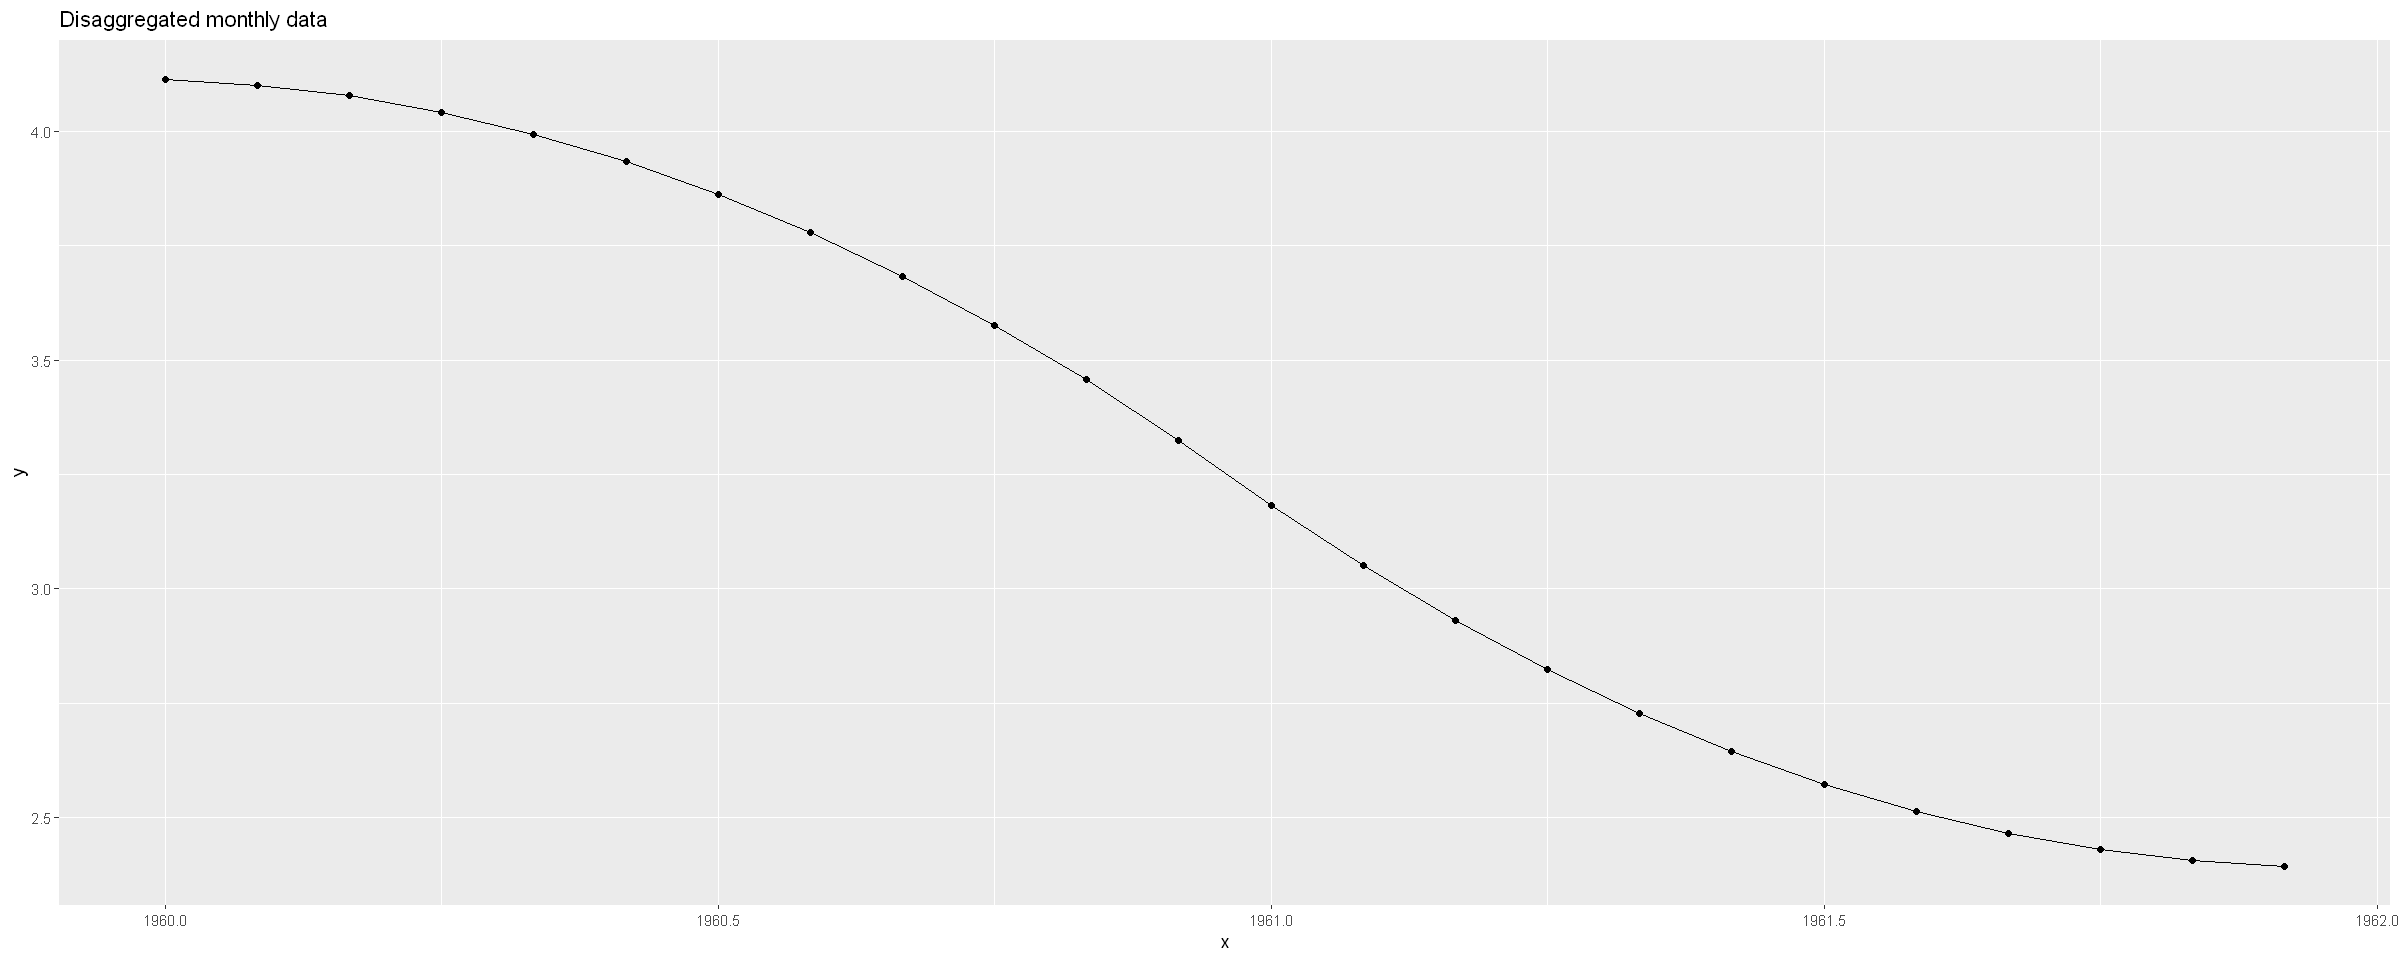

In [236]:
data.frame(x = time(predict(model1)), y = predict(model1)) %>%
  ggplot(aes(x = x, y = y)) +
  geom_line() + geom_point() +
  labs(title = "Disaggregated monthly data")

In [237]:
disagg_values <- predict(model1)
values_to_del <- c(1, 21, 22, 23, 24)
disagg_values <- disagg_values[-values_to_del]
DT_FINAL[country == 8, Y := disagg_values]
DT_FINAL[country == 8]

country,time,Y,X1,X2,X3
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
8,1960.083,4.101117,-6.090356,-0.1396896,-9.675052
8,1960.167,4.077242,-6.037157,-0.1579051,-9.471597
8,1960.250,4.041430,-6.012897,-0.1990881,-9.329567
8,1960.333,3.993681,-5.966495,-0.2326332,-9.217731
8,1960.417,3.933995,-5.927909,-0.2637473,-9.091535
8,1960.500,3.862371,-5.881567,-0.3159312,-8.988003
8,1960.583,3.778811,-5.851223,-0.2501173,-8.891959
8,1960.667,3.683312,-5.805560,-0.2655576,-8.802676
8,1960.750,3.575877,-5.773495,-0.3003677,-8.801129


Due to having only two annual data points, I was not able to include the proxy variables in the disaggregation so I did that as if it were without additional information.

# **Task Set 3: Panel Data Model**

Having filled in the missing values of one country in the first task and disaggregated annual to quaterly data of another country in the second task, use the finalized `DT_FINAL` to estimate a panel data model on the dependent variable `Y`.

Carry out the tasks below:

- **(A)** Visually examine whether $Y_{i,t}$ is heterogeneous across countries and whether it is heterogeneous across years.
- **(B)** Estimate a Fixed Effects (FE) model and test whether individual and/or time fixed effects are statistically significant.
- **(C)** Estimate a Random Effects (RE) model and test whether the RE models coefficients are consistent, compared to the FE model. Select the best model.
- **(D)** If there are any insignificant coefficients - remove them from the final model and plot the fitted values alongside the actual values for each country.
- **(E)** Examine the plots - does the model fit each country with the same accuracy (i.e. is the model equally good for each country)? What about the `5th` and `8th` countries?

*Solutions*:

**(A) Visually examine whether 𝑌𝑖,𝑡 is heterogeneous across countries and whether it is heterogeneous across years.**

Warning message in arrows(x, li, x, pmax(y - gap, li), col = barcol, lwd = lwd, :
"zero-length arrow is of indeterminate angle and so skipped"
Warning message in arrows(x, li, x, pmax(y - gap, li), col = barcol, lwd = lwd, :
"zero-length arrow is of indeterminate angle and so skipped"
Warning message in arrows(x, li, x, pmax(y - gap, li), col = barcol, lwd = lwd, :
"zero-length arrow is of indeterminate angle and so skipped"
Warning message in arrows(x, li, x, pmax(y - gap, li), col = barcol, lwd = lwd, :
"zero-length arrow is of indeterminate angle and so skipped"
Warning message in arrows(x, li, x, pmax(y - gap, li), col = barcol, lwd = lwd, :
"zero-length arrow is of indeterminate angle and so skipped"
Warning message in arrows(x, li, x, pmax(y - gap, li), col = barcol, lwd = lwd, :
"zero-length arrow is of indeterminate angle and so skipped"
Warning message in arrows(x, li, x, pmax(y - gap, li), col = barcol, lwd = lwd, :
"zero-length arrow is of indeterminate angle and so skipped"

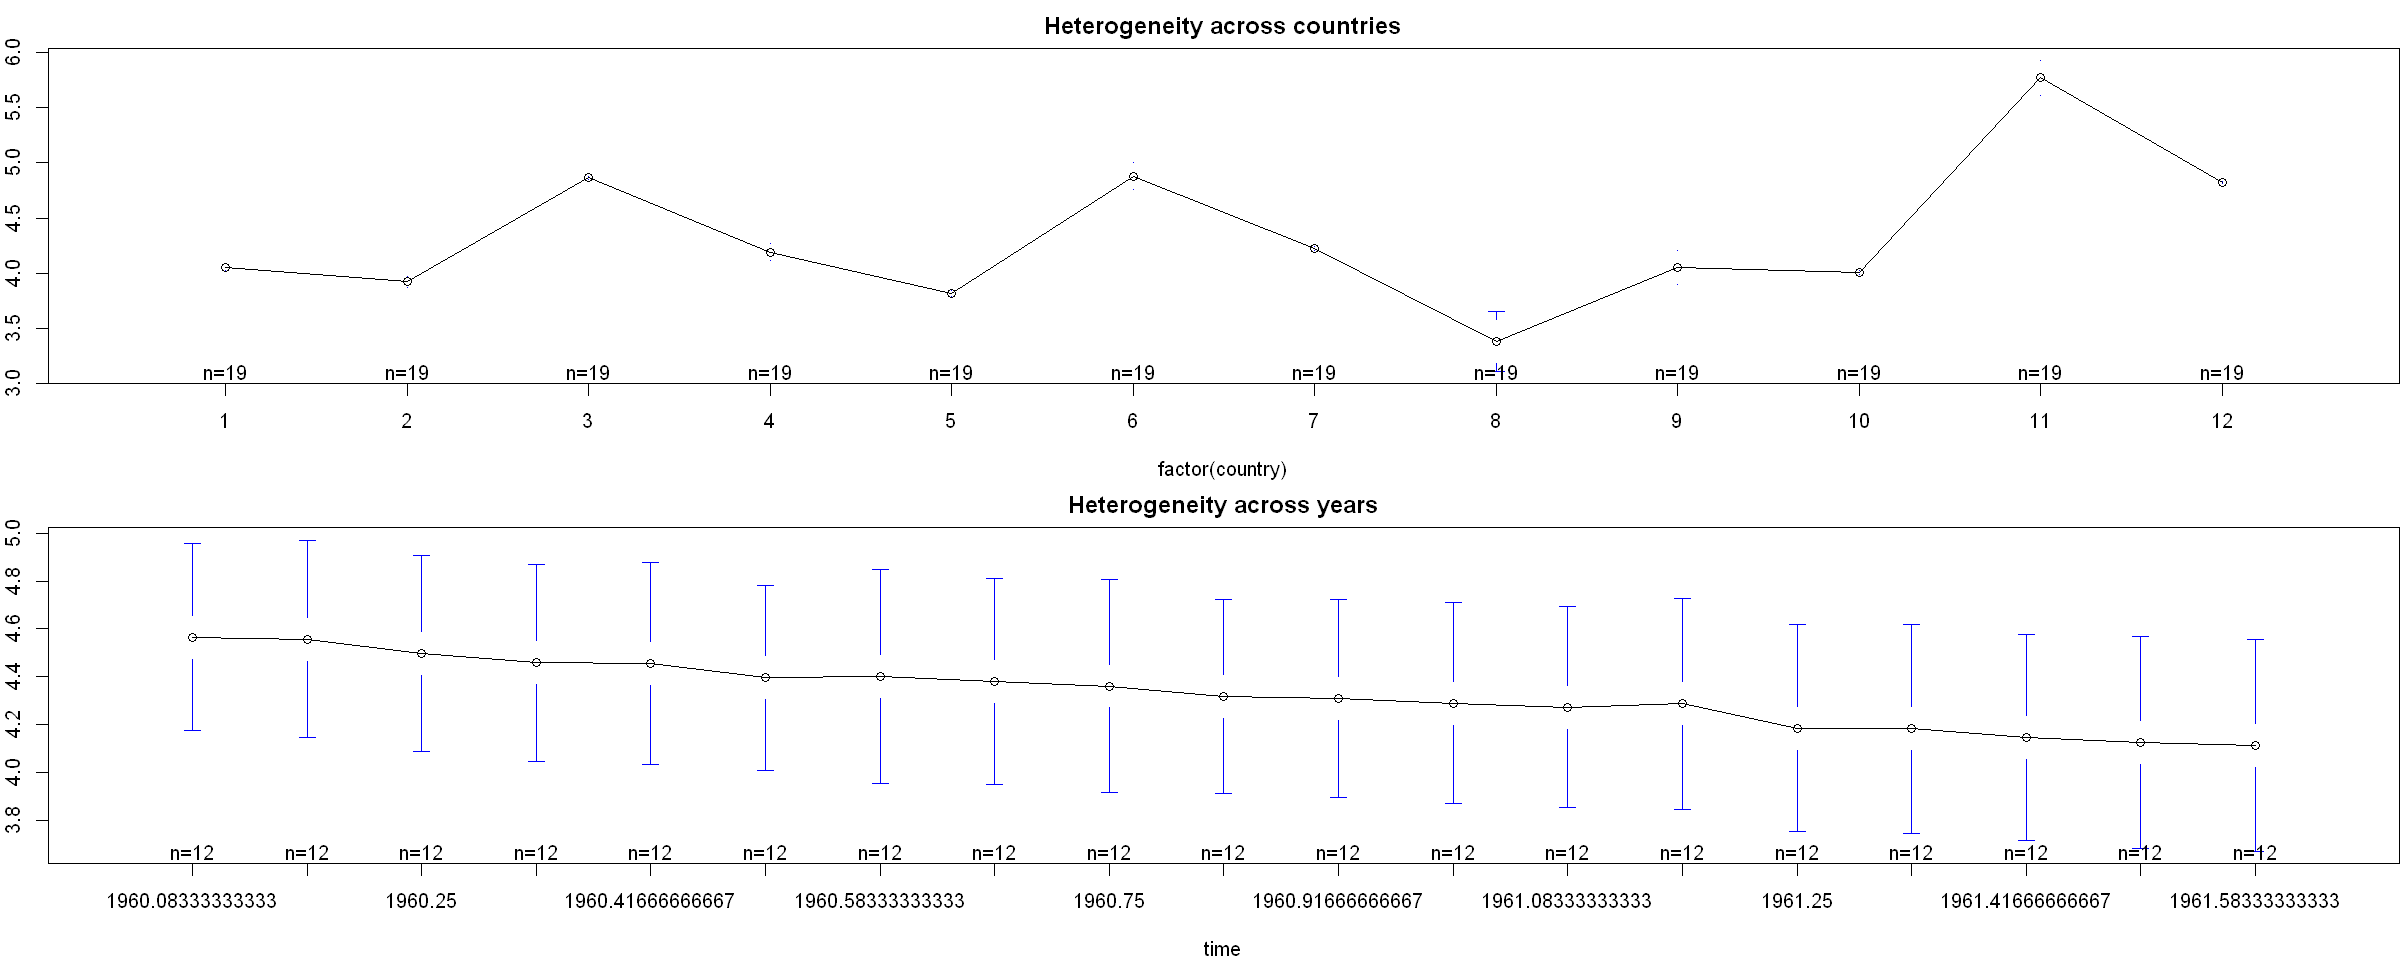

In [239]:
par(mfrow = c(2, 1), mar = c(4, 2, 2, 0))
gplots::plotmeans(Y ~ factor(country), 
                  main = "Heterogeneity across countries", data = DT_FINAL)
gplots::plotmeans(Y ~ time, 
                  main = "Heterogeneity across years", data = DT_FINAL)

Here we can see from the first plot, that the countries differ in gas consumption per car and their variance. The mean values of country 8 differ significantly, as shown by the blue bars in plot 1 which indicates that most probably the disaggregation does not give optimal results. From the second plot it can be seen that throughout the years, the average value is decreasing, maybe suggesting a shift towards more sustainable fuels or technology advances, which mean that cars in general spend less fuel. Overall, the log of fuel spent per car is homogeneic across countries, but heterogeneic across years.

**(B) Estimate a Fixed Effects (FE) model and test whether individual and/or time fixed effects are statistically significant.**

In [242]:
model_fe <- plm(formula = Y ~ X1 + X2 + X3, data = DT_FINAL, index = c("country", "time"),
                effect = "individual", model = "within")
summary(model_fe)

Oneway (individual) effect Within Model

Call:
plm(formula = Y ~ X1 + X2 + X3, data = DT_FINAL, effect = "individual", 
    model = "within", index = c("country", "time"))

Balanced Panel: n = 12, T = 19, N = 228

Residuals:
      Min.    1st Qu.     Median    3rd Qu.       Max. 
-0.6898184 -0.0458077  0.0059896  0.0554202  0.4812018 

Coefficients:
    Estimate Std. Error t-value  Pr(>|t|)    
X1  0.342909   0.132565  2.5867  0.010355 *  
X2 -0.248388   0.087787 -2.8294  0.005109 ** 
X3 -0.506228   0.058835 -8.6042 1.694e-15 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Total Sum of Squares:    11.46
Residual Sum of Squares: 4.684
R-Squared:      0.59128
Adj. R-Squared: 0.56441
F-statistic: 102.711 on 3 and 213 DF, p-value: < 2.22e-16

The null hypothesis we are testing is if the individual fixed effects are zero.
The alternative hypothesis would be that the fixed effects are not zero.

In [249]:
model_pool = plm(formula = Y ~ X1 + X2 + X3, data = DT_FINAL, index = c("country", "time"), model = "pooling")
summary(model_pool)

Pooling Model

Call:
plm(formula = Y ~ X1 + X2 + X3, data = DT_FINAL, model = "pooling", 
    index = c("country", "time"))

Balanced Panel: n = 12, T = 19, N = 228

Residuals:
    Min.  1st Qu.   Median  3rd Qu.     Max. 
-1.52675 -0.13533  0.02214  0.20776  0.68870 

Coefficients:
             Estimate Std. Error t-value  Pr(>|t|)    
(Intercept)  2.316165   0.207184  11.179 < 2.2e-16 ***
X1           0.953331   0.069098  13.797 < 2.2e-16 ***
X2          -0.989161   0.059752 -16.555 < 2.2e-16 ***
X3          -0.805655   0.036855 -21.860 < 2.2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Total Sum of Squares:    96.899
Residual Sum of Squares: 26.817
R-Squared:      0.72325
Adj. R-Squared: 0.71954
F-statistic: 195.13 on 3 and 224 DF, p-value: < 2.22e-16

In [250]:
fixef(model_fe)

1       2       3       4       5       6       7       8       9      10 
1.55513 1.47923 2.42286 1.72973 1.48854 1.67746 1.77387 0.84977 1.15902 1.83663 
     11      12 
1.87055 2.44849

In [251]:
pFtest(model_fe, model_pool)


	F test for individual effects

data:  Y ~ X1 + X2 + X3
F = 91.498, df1 = 11, df2 = 213, p-value < 2.2e-16
alternative hypothesis: significant effects


Since the p-value is way smaller than the threshold (0.05), we throw out the null hypothesis and conclude the alternative: The fixed effects are not zero, and are statistically significant.

**(C) Estimate a Random Effects (RE) model and test whether the RE models coefficients are consistent, compared to the FE model. Select the best model.**

In [252]:
model_re <- plm(formula = Y ~ X1 + X2 + X3, data = DT_FINAL, index = c("country", "time"),
                effect = "individual", model = "random")
summary(model_re)

Oneway (individual) effect Random Effect Model 
   (Swamy-Arora's transformation)

Call:
plm(formula = Y ~ X1 + X2 + X3, data = DT_FINAL, effect = "individual", 
    model = "random", index = c("country", "time"))

Balanced Panel: n = 12, T = 19, N = 228

Effects:
                  var std.dev share
idiosyncratic 0.02199 0.14829 0.148
individual    0.12672 0.35597 0.852
theta: 0.9049

Residuals:
     Min.   1st Qu.    Median   3rd Qu.      Max. 
-0.761673 -0.055336  0.014885  0.079634  0.405439 

Coefficients:
             Estimate Std. Error z-value  Pr(>|z|)    
(Intercept)  1.499360   0.332354  4.5113 6.442e-06 ***
X1           0.312498   0.106054  2.9466  0.003213 ** 
X2          -0.328923   0.077614 -4.2379 2.256e-05 ***
X3          -0.501668   0.050835 -9.8686 < 2.2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Total Sum of Squares:    12.233
Residual Sum of Squares: 5.0415
R-Squared:      0.58789
Adj. R-Squared: 0.58237
Chisq: 319.543 on 3 DF, p-val

In [254]:
phtest(model_fe, model_re)


	Hausman Test

data:  Y ~ X1 + X2 + X3
chisq = 13.972, df = 3, p-value = 0.002944
alternative hypothesis: one model is inconsistent


With the help of the Hausman test, the null hypothesis given by the test that both models are consistent is thrown out because the p-value is smaller than the threshold (0.002944<0.05), and the alternative is concluded - one model is inconsistent. Knowing that the Fixed Effects model is consistent both when there is correlation between regressors and effects, and when there is no correlation, we can conclude that the Random Effects model is inconsistent, thus yielding it unusable in this scenario.

**(D) If there are any insignificant coefficients - remove them from the final model and plot the fitted values alongside the actual values for each country.**

Because in the heterogeneity plot over time the dependent variable Y shows some effect of time on the fuel spent per car, I am going to model a two-way fixed effects model, and also because the fixed effects one is better than the random effects model.

In [255]:
model_fe_twoway <- plm(formula = Y ~ X1 + X2 + X3, data = DT_FINAL, index = c("country", "time"),
                effect = "twoway", model = "within")
summary(model_fe_twoway)

Twoways effects Within Model

Call:
plm(formula = Y ~ X1 + X2 + X3, data = DT_FINAL, effect = "twoway", 
    model = "within", index = c("country", "time"))

Balanced Panel: n = 12, T = 19, N = 228

Residuals:
      Min.    1st Qu.     Median    3rd Qu.       Max. 
-0.6732230 -0.0535456 -0.0017345  0.0644645  0.4877835 

Coefficients:
    Estimate Std. Error t-value  Pr(>|t|)    
X1  0.406095   0.243237  1.6695   0.09661 .  
X2 -0.226760   0.103148 -2.1984   0.02910 *  
X3 -0.513860   0.066498 -7.7275 5.659e-13 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Total Sum of Squares:    7.2428
Residual Sum of Squares: 4.6227
R-Squared:      0.36175
Adj. R-Squared: 0.25701
F-statistic: 36.8411 on 3 and 195 DF, p-value: < 2.22e-16

In [256]:
pFtest(model_fe_twoway, model_pool)


	F test for twoways effects

data:  Y ~ X1 + X2 + X3
F = 32.283, df1 = 29, df2 = 195, p-value < 2.2e-16
alternative hypothesis: significant effects


Here the null hypothesis that the fixed time effects are not significant is thrown out, and the alternative is accepted that there may be some significant time effects. Because the pooled and random effects models show weak results, I just need to compare the twoway with the individual fixed effects model, because one of them fits the dataset the best.

In [257]:
pFtest(model_fe_twoway, model_fe)


	F test for twoways effects

data:  Y ~ X1 + X2 + X3
F = 0.14358, df1 = 18, df2 = 195, p-value = 1
alternative hypothesis: significant effects


Since the p-value here is significantly bigger than 0.05, we can definitely accept the null hypothesis here that after all, there are no significant time effects, which means the two-way model does not provide a better fit than the individual. So the best model would be the standard Fixed Effects model.

In [258]:
summary(model_fe)

Oneway (individual) effect Within Model

Call:
plm(formula = Y ~ X1 + X2 + X3, data = DT_FINAL, effect = "individual", 
    model = "within", index = c("country", "time"))

Balanced Panel: n = 12, T = 19, N = 228

Residuals:
      Min.    1st Qu.     Median    3rd Qu.       Max. 
-0.6898184 -0.0458077  0.0059896  0.0554202  0.4812018 

Coefficients:
    Estimate Std. Error t-value  Pr(>|t|)    
X1  0.342909   0.132565  2.5867  0.010355 *  
X2 -0.248388   0.087787 -2.8294  0.005109 ** 
X3 -0.506228   0.058835 -8.6042 1.694e-15 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Total Sum of Squares:    11.46
Residual Sum of Squares: 4.684
R-Squared:      0.59128
Adj. R-Squared: 0.56441
F-statistic: 102.711 on 3 and 213 DF, p-value: < 2.22e-16

Once again, we see the p-values for each coefficient and because all of them are below 0.05, we conclude that all of: real per-capita income, real motor gasoline price and the stock of cars per capita provide valuable information for predicting future values of the fuel spent per car for each country analysed.

In [261]:
model <- model_fe
fitted_values <- fitted(model)

In [264]:
#par(mfrow = c(3, 4))
#for(i in unique(DT_FINAL$country)) {
    #start_index <- (i - 1) * 19 + 1
    #dt_temp <- DT_FINAL[country==i]
    #plot(dt_temp$time, dt_temp$Y, type = "l", xlab = "Time", ylab = "Y Values", 
         #main = paste("Plot for Fixed Effects model for country ", i))
    #lines(dt_temp$time, fitted_values[start_index:(start_index + 18)], col = "red")
#}

In [266]:
df <- DT_FINAL
df$model_fe <- as.numeric(model_fe$model[[1]] - model_fe$residuals)
glimpse(df)

Rows: 228
Columns: 7
$ country  <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2…
$ time     <dbl> 1960.083, 1960.167, 1960.250, 1960.333, 1960.417, 1960.500, 1…
$ Y        <dbl> 4.173244, 4.100989, 4.073177, 4.059509, 4.037689, 4.033983, 4…
$ X1       <dbl> -6.474277, -6.426006, -6.407308, -6.370679, -6.322247, -6.294…
$ X2       <dbl> -0.3345476, -0.3513276, -0.3795177, -0.4142514, -0.4453354, -…
$ X3       <dbl> -9.766840, -9.608622, -9.457257, -9.343155, -9.237739, -9.123…
$ model_fe <dbl> 4.362389, 4.303016, 4.239804, 4.203231, 4.174195, 4.138873, 4…


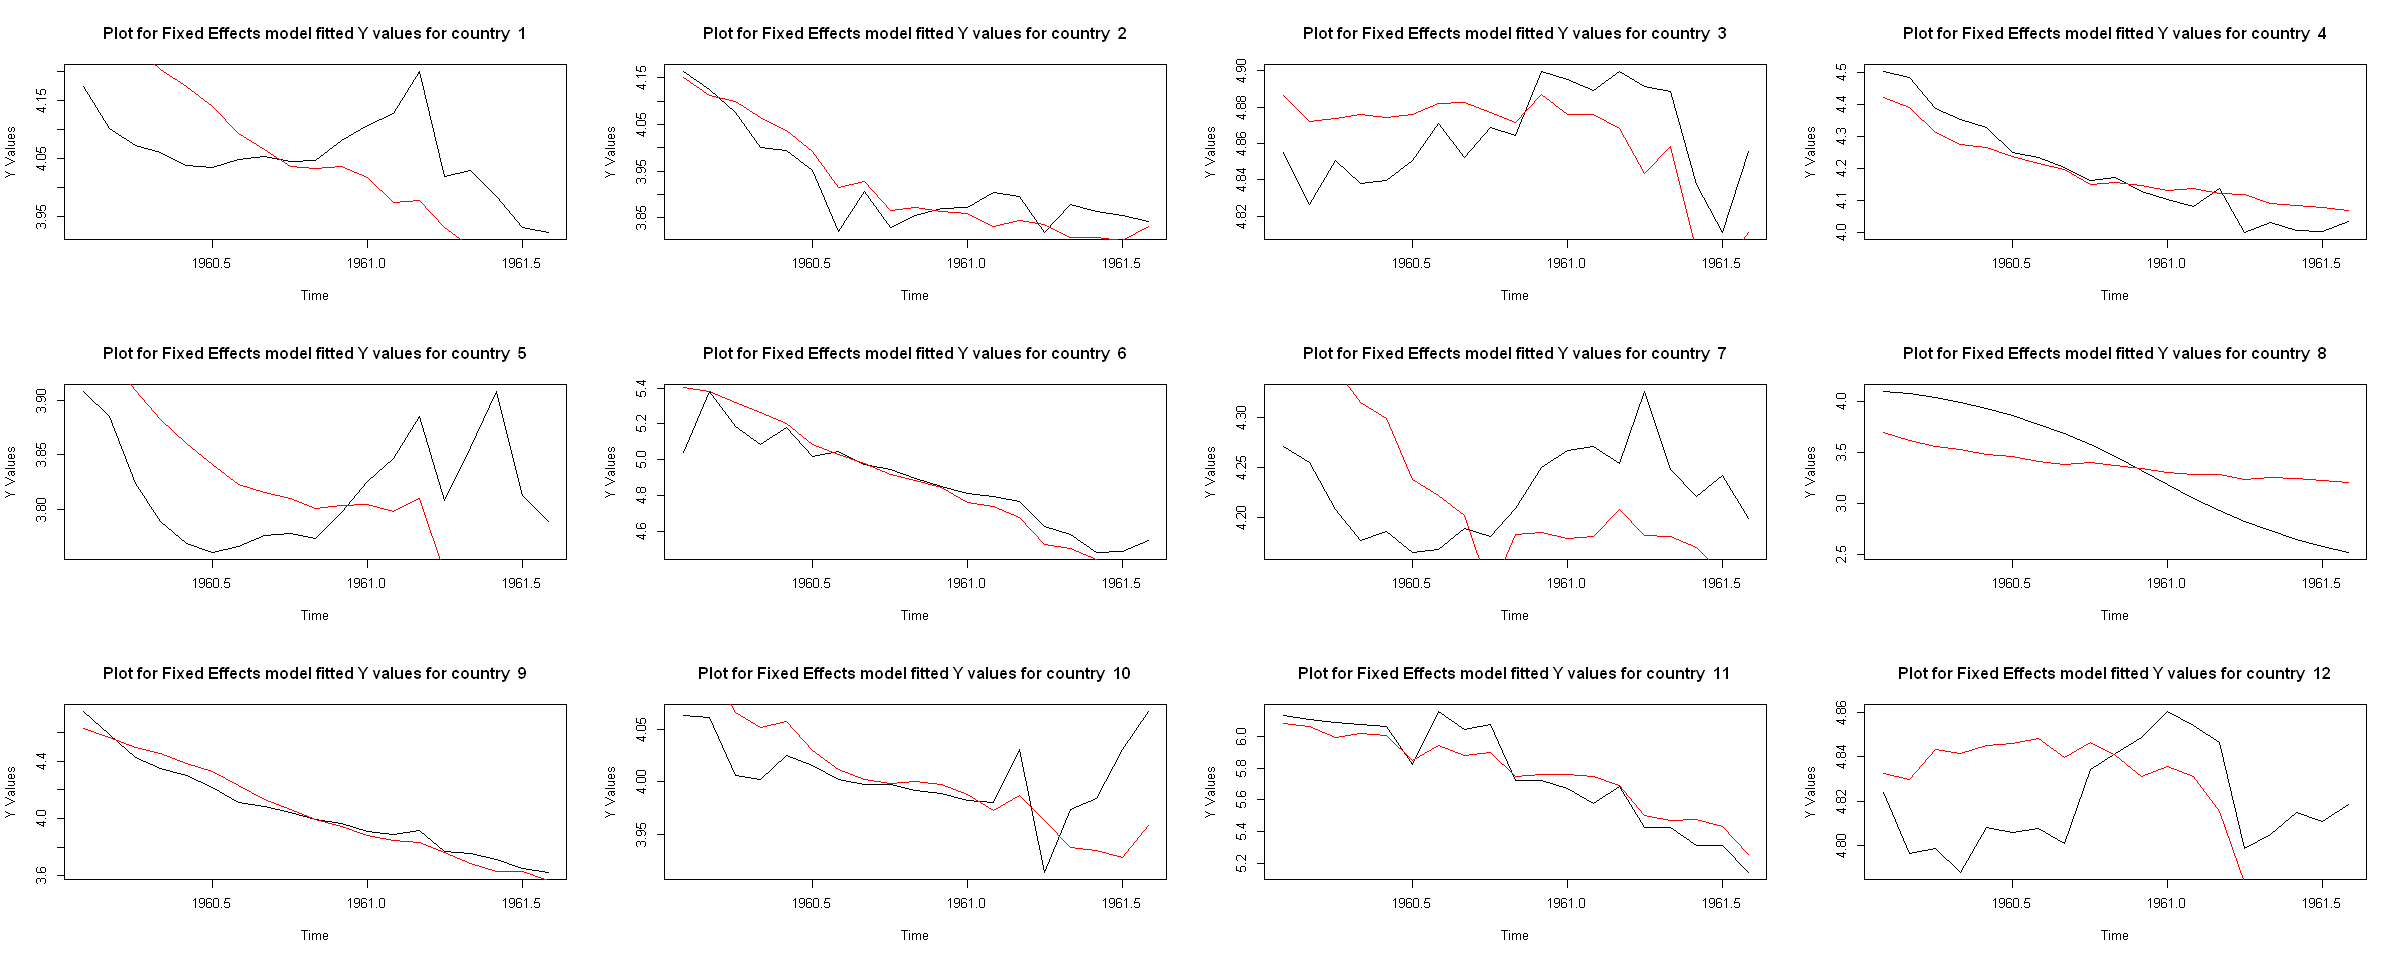

In [267]:
par(mfrow = c(3, 4))
for(i in unique(df$country)) {
    dt_temp <- df[country==i]
    plot(dt_temp$time, dt_temp$Y, type = "l", xlab = "Time", ylab = "Y Values", 
         main = paste("Plot for Fixed Effects model fitted Y values for country ", i))
    lines(dt_temp$time, dt_temp$model_fe, col = "red")
}

**(E) Examine the plots - does the model fit each country with the same accuracy (i.e. is the model equally good for each country)? What about the 5th and 8th countries?**

After a short look at the plots, I can conclude that the model is a good fit for country 9. The model has correctly estimated the trend for countries 2, 3, 4, 6, 9 and 11, the seasonality is somewhat correctly estimated for countries 5, 7, 8, 9 and 11. The model is not equally good for each country, for example it missed both the trend and seasonality for country 12. For country 5 specifically, the seasonality is estimated well but a bit ahead in time, and it is not a very good fit. For country 8, the actual values may be very wrong due to the incomplete disaggregation, but the model still did not manage to capture the trend even though this is a very simple slope. Given the tests I ran, I am surprised that this is the best model out of those available in the lectures, but the dataset is pretty small for individual countries with 19 samples each, so maybe with a more robust dataset the model would predict much better, and also the predicted values with imputation for country 5 would be much more accurate to the real values.